In [1]:
# 필요한 모듈들
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as mcl
%matplotlib inline   
import xlrd
import wbgapi as wb
from gedaTools import *
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
vawDT = wb.data.DataFrame(['SG.VAW.ARGU.ZS', 'SG.VAW.BURN.ZS',\
    'SG.VAW.GOES.ZS', 'SG.VAW.NEGL.ZS', 'SG.VAW.REFU.ZS'], skipBlanks=True, columns='series')
### skipBlanks = True : 행 전체가 결측치인 곳은 알아서 제외하고 가져옴

In [39]:
vawDT
#### vawDT : 폭력이 허용된다고 생각하는 여성 데이터 : 196x5, 데이터 양 자체는 적지만 
#### 그래서 더욱 시각화를 했을 때 어떤 결과가 나올지 궁금해졌음

SG.VAW.ARGU.ZS  SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  \
economy time                                                     
AFG     YR2015            59.2            18.2            66.9   
AGO     YR2016            15.2            10.5            14.5   
ALB     YR2005             8.7             3.1            17.0   
        YR2009            12.1             4.4            18.6   
        YR2018             1.8             0.8             3.7   
...                        ...             ...             ...   
ZMB     YR2018            32.2            21.3            26.0   
ZWE     YR1999            31.7            12.0            27.8   
        YR2006            26.0            12.2            33.0   
        YR2011            15.6             7.5            22.3   
        YR2015            16.7             8.1            22.8   

                SG.VAW.NEGL.ZS  SG.VAW.REFU.ZS  
economy time                                    
AFG     YR2015            48.4            33.4  
AGO     YR2016            16.3            11.5  
ALB     YR2005            19.6             8.7  
        YR2009            21.7             8.9  
        YR2018             5.2             0.9  
...                        ...             ...  
ZMB     YR2018            31.3            29.5  
ZWE     YR1999            31.2            22.3  
        YR2006            30.2            24.3  
        YR2011            21.4            16.9  
        YR2015            21.4            14.5  

[196 rows x 5 columns]

In [40]:
conList = set(map(lambda x: x[0], vawDT.index) )
### 조사된 나라목록
len(conList)
#총 83개국

83

In [41]:
wb.economy.coder(list(conList))

ORIGINAL NAME,WBG NAME,ISO_CODE
PHL,Philippines,PHL
MDG,Madagascar,MDG
TGO,Togo,TGO
CMR,Cameroon,CMR
LBR,Liberia,LBR
AZE,Azerbaijan,AZE
TJK,Tajikistan,TJK
HTI,Haiti,HTI
VNM,Vietnam,VNM
MDV,Maldives,MDV


In [42]:
wb.economy.info(db=66)

id,value,region,incomeLevel
AFG,Afghanistan,SAS,LIC
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC
ARM,Armenia,ECS,UMC
AUS,Australia,EAS,HIC
AUT,Austria,ECS,HIC
AZE,Azerbaijan,ECS,UMC
BDI,Burundi,SSF,LIC


In [43]:
ecoDF = wb.economy.DataFrame()
ecoR = ecoDF.reset_index()
ecoR

,id,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
0,ABW,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
1,AFE,Africa Eastern and Southern,True,NaN,NaN,,,,,
2,AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
3,AFW,Africa Western and Central,True,NaN,NaN,,,,,
4,AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
...,...,...,...,...,...,...,...,...,...,...
261,XKX,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
262,YEM,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
263,ZAF,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria
264,ZMB,Zambia,False,28.2937,-15.39820,SSF,SSA,IDX,LMC,Lusaka


In [44]:
vawE = ecoR[ecoR.id.isin(conList)]
vawE
### '조사된' 나라 모음

,id,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
2,AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
4,AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
5,ALB,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
10,ARM,Armenia,False,44.5090,40.15960,ECS,ECA,IBD,UMC,Yerevan
15,AZE,Azerbaijan,False,49.8932,40.38340,ECS,ECA,IBD,UMC,Baku
...,...,...,...,...,...,...,...,...,...,...
257,VNM,Vietnam,False,105.8250,21.00690,EAS,EAP,IBD,LMC,Hanoi
262,YEM,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
263,ZAF,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria
264,ZMB,Zambia,False,28.2937,-15.39820,SSF,SSA,IDX,LMC,Lusaka


## 1차 시각화 : 무엇을 더 시각화 할 지 생각해 보기 위해, 조사된 나라의 region 시각화
SAS:South Asia <br>
SSF:Sub-Saharan Africa <br>
ECS:Europe & Central Asia <br>
LCN:Latin America & Caribbean <br>
MEA:Middle East & North Africa <br>
EAS:East Asia & Pacific

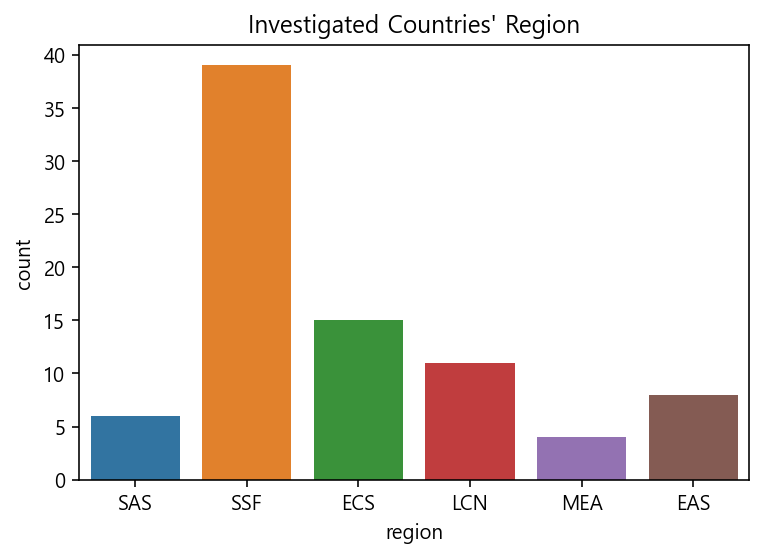

In [45]:
sns.countplot(x="region", data=vawE)
plt.title("Investigated Countries' Region")
plt.show()

#### 조사에서 빠진 대륙이 있음

#### 사하라 이남 대륙의 지분이 가장 조사지분이 많고
#### 중앙아시아 & 북 아프리카 대륙이 가장 조사 지분이 적다

## 1차 시각화 -2 :  조사된 나라의 OECD 분류 시각화
LIC -> HIC 로 갈수록 소득수준 높은 것.
중간 수준인 LMC가 가장 많음.

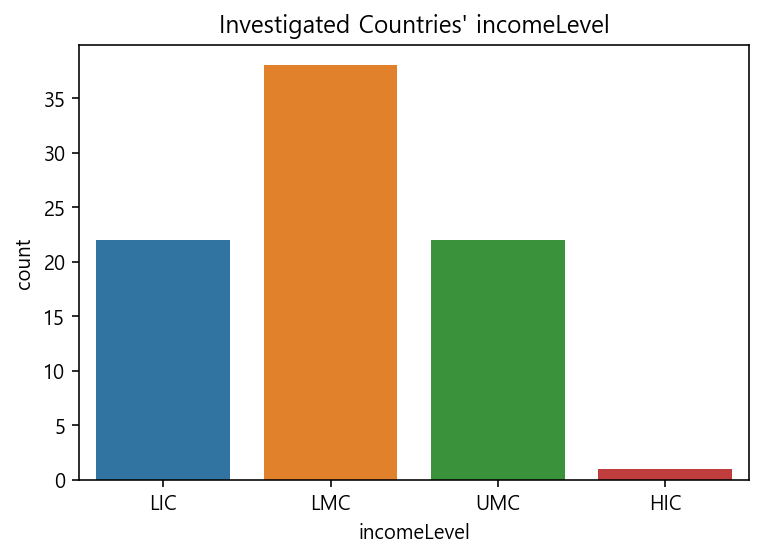

In [46]:
sns.countplot(x="incomeLevel", data=vawE)
plt.title("Investigated Countries' incomeLevel")
plt.show()

In [47]:
vawYDT = vawDT.copy()
vawYDT = vawYDT.reset_index()
vawYDT
### vawYDT : 다시 index column화

,economy,time,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS
0,AFG,YR2015,59.2,18.2,66.9,48.4,33.4
1,AGO,YR2016,15.2,10.5,14.5,16.3,11.5
2,ALB,YR2005,8.7,3.1,17.0,19.6,8.7
3,ALB,YR2009,12.1,4.4,18.6,21.7,8.9
4,ALB,YR2018,1.8,0.8,3.7,5.2,0.9
...,...,...,...,...,...,...,...
191,ZMB,YR2018,32.2,21.3,26.0,31.3,29.5
192,ZWE,YR1999,31.7,12.0,27.8,31.2,22.3
193,ZWE,YR2006,26.0,12.2,33.0,30.2,24.3
194,ZWE,YR2011,15.6,7.5,22.3,21.4,16.9


In [48]:
vawYDT['time'] = timeToInt(vawYDT) ### gedaTool.py에 timeToInt 메서드로 time column int 변환 메서드 정의 해놓음
vawYDT

,economy,time,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS
0,AFG,2015,59.2,18.2,66.9,48.4,33.4
1,AGO,2016,15.2,10.5,14.5,16.3,11.5
2,ALB,2005,8.7,3.1,17.0,19.6,8.7
3,ALB,2009,12.1,4.4,18.6,21.7,8.9
4,ALB,2018,1.8,0.8,3.7,5.2,0.9
...,...,...,...,...,...,...,...
191,ZMB,2018,32.2,21.3,26.0,31.3,29.5
192,ZWE,1999,31.7,12.0,27.8,31.2,22.3
193,ZWE,2006,26.0,12.2,33.0,30.2,24.3
194,ZWE,2011,15.6,7.5,22.3,21.4,16.9


## 2차 시각화 : 남편의 폭력을 정당하다고 생각하는 여성 비율의 데이터의 연도별 추이 boxplot

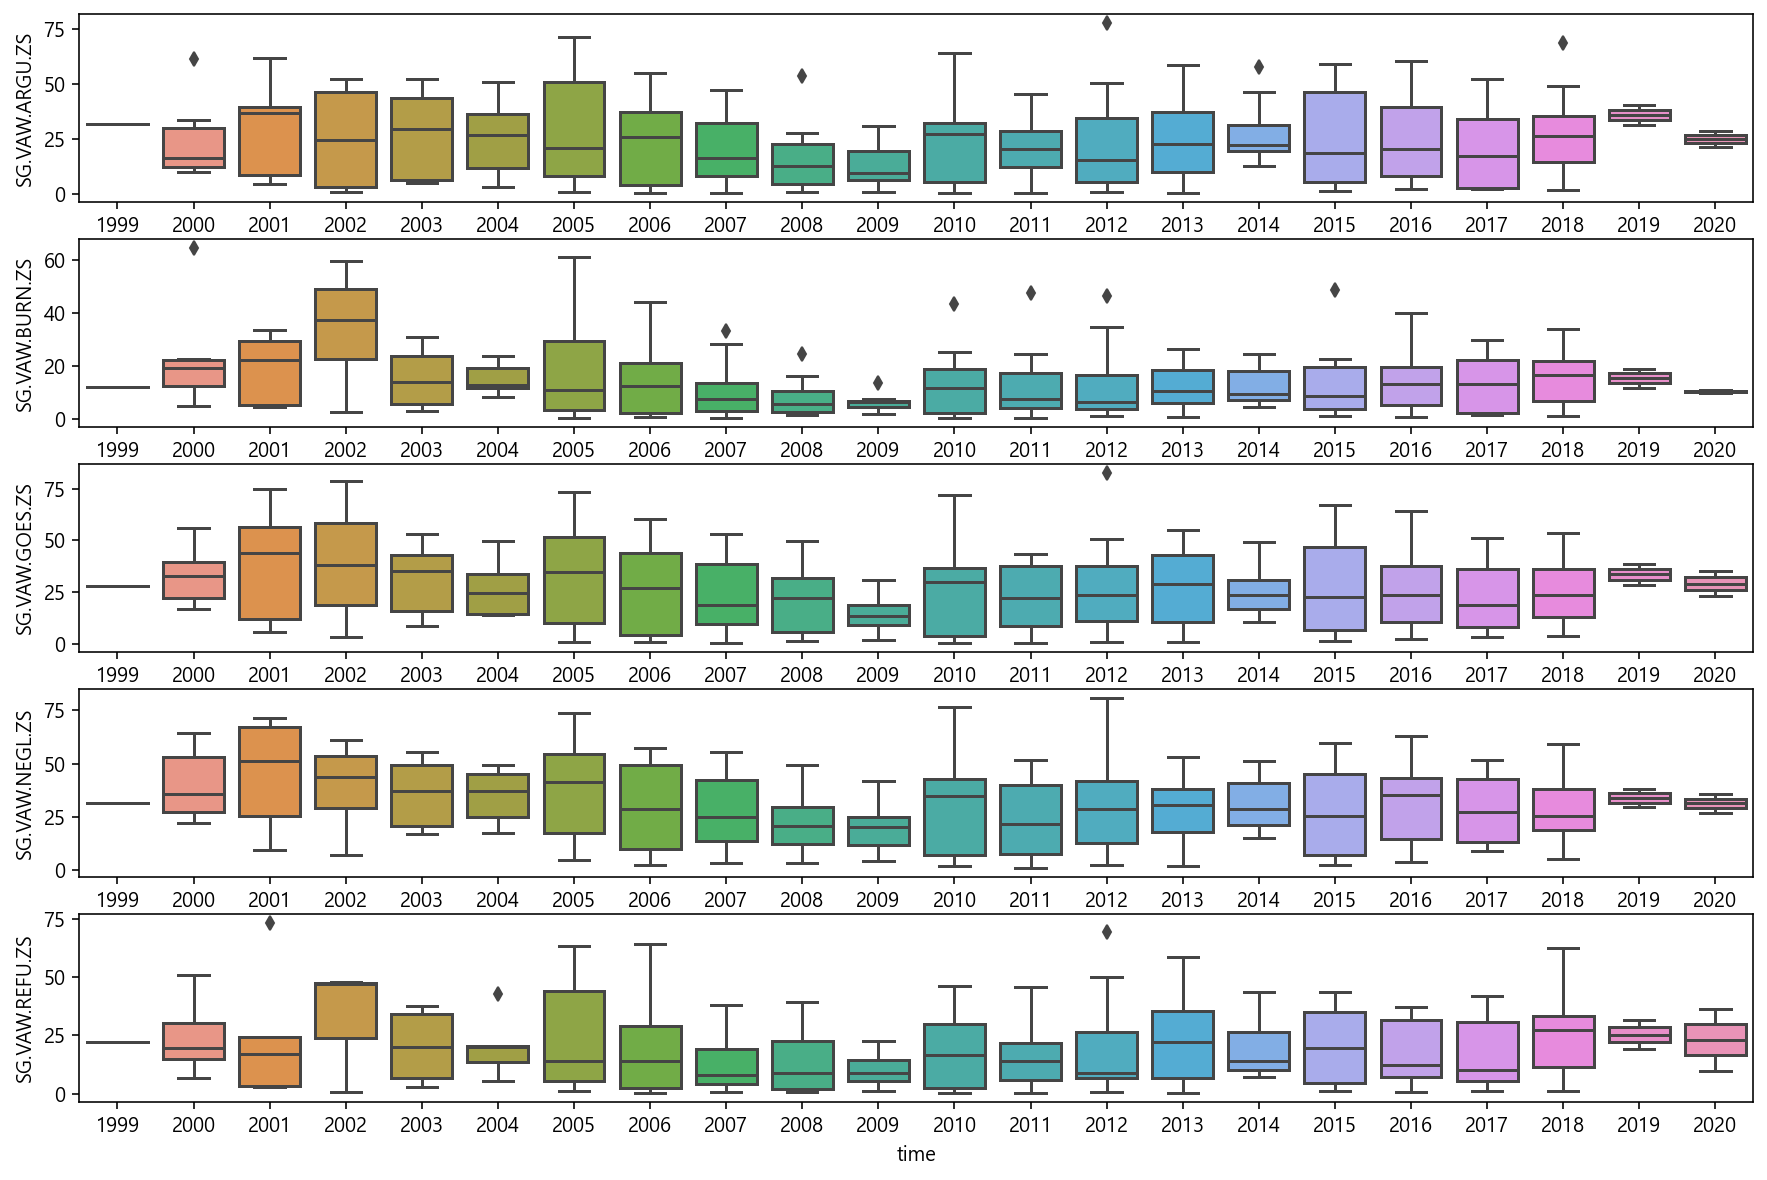

In [49]:
# figure size
# plt.figure()
fig, ax = plt.subplots(5,1, figsize=(15,10))

for i in range(0,5):
    m = sns.boxplot(x='time', y=vawYDT.iloc[:,i+2], data=vawYDT.iloc[:,1:], ax=ax[i])
plt.show()

#### 연도별 특징을 보기위해 boxplot을 그렸는데, 최고값은 대체로 00년대에서 나타남을 볼 수 있엇고
#### 그 외 최댓값은 이상치로 인해서 다양한 곳에서 나타나는 듯 함.
#### 또, 현대로 오면서 많이 줄어드는 양상을 보이지 않을까 예상했었는데, 그렇지는 않은 것같음.

In [50]:
vawYG = vawYDT.groupby('time').mean()
vawYG
### vawYG : 연도에 해당하는 사유별 평균

,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS
time,,,,,
1999,31.700000,12.000000,27.800000,31.200000,22.300000
2000,24.966667,23.483333,33.066667,40.166667,23.916667
2001,30.220000,18.900000,38.640000,44.840000,24.120000
2002,25.500000,34.100000,39.450000,38.875000,31.900000
2003,27.777778,14.244444,31.537500,35.011111,20.866667
2004,25.740000,15.020000,27.160000,34.720000,20.480000
2005,29.712500,19.053333,33.647059,37.529412,24.517647
2006,23.454167,13.233333,26.654167,29.183333,19.945833
2007,20.118182,10.910000,23.036364,25.900000,13.540000


In [51]:
vawM = vawYG.reset_index()
vawM.columns = ['year', 'ARGU', 'BURN', 'GOES', 'NEGL', 'REFU']
### 데이터 프레임 열 편하게 재설정

In [52]:
vawM

,year,ARGU,BURN,GOES,NEGL,REFU
0,1999,31.700000,12.000000,27.800000,31.200000,22.300000
1,2000,24.966667,23.483333,33.066667,40.166667,23.916667
2,2001,30.220000,18.900000,38.640000,44.840000,24.120000
3,2002,25.500000,34.100000,39.450000,38.875000,31.900000
4,2003,27.777778,14.244444,31.537500,35.011111,20.866667
5,2004,25.740000,15.020000,27.160000,34.720000,20.480000
6,2005,29.712500,19.053333,33.647059,37.529412,24.517647
7,2006,23.454167,13.233333,26.654167,29.183333,19.945833
8,2007,20.118182,10.910000,23.036364,25.900000,13.540000
9,2008,17.162500,8.250000,21.185714,22.150000,13.600000


### 2차 시각화 -2 : 연도별 아내 폭력 정당화 사유 평균값 시각화

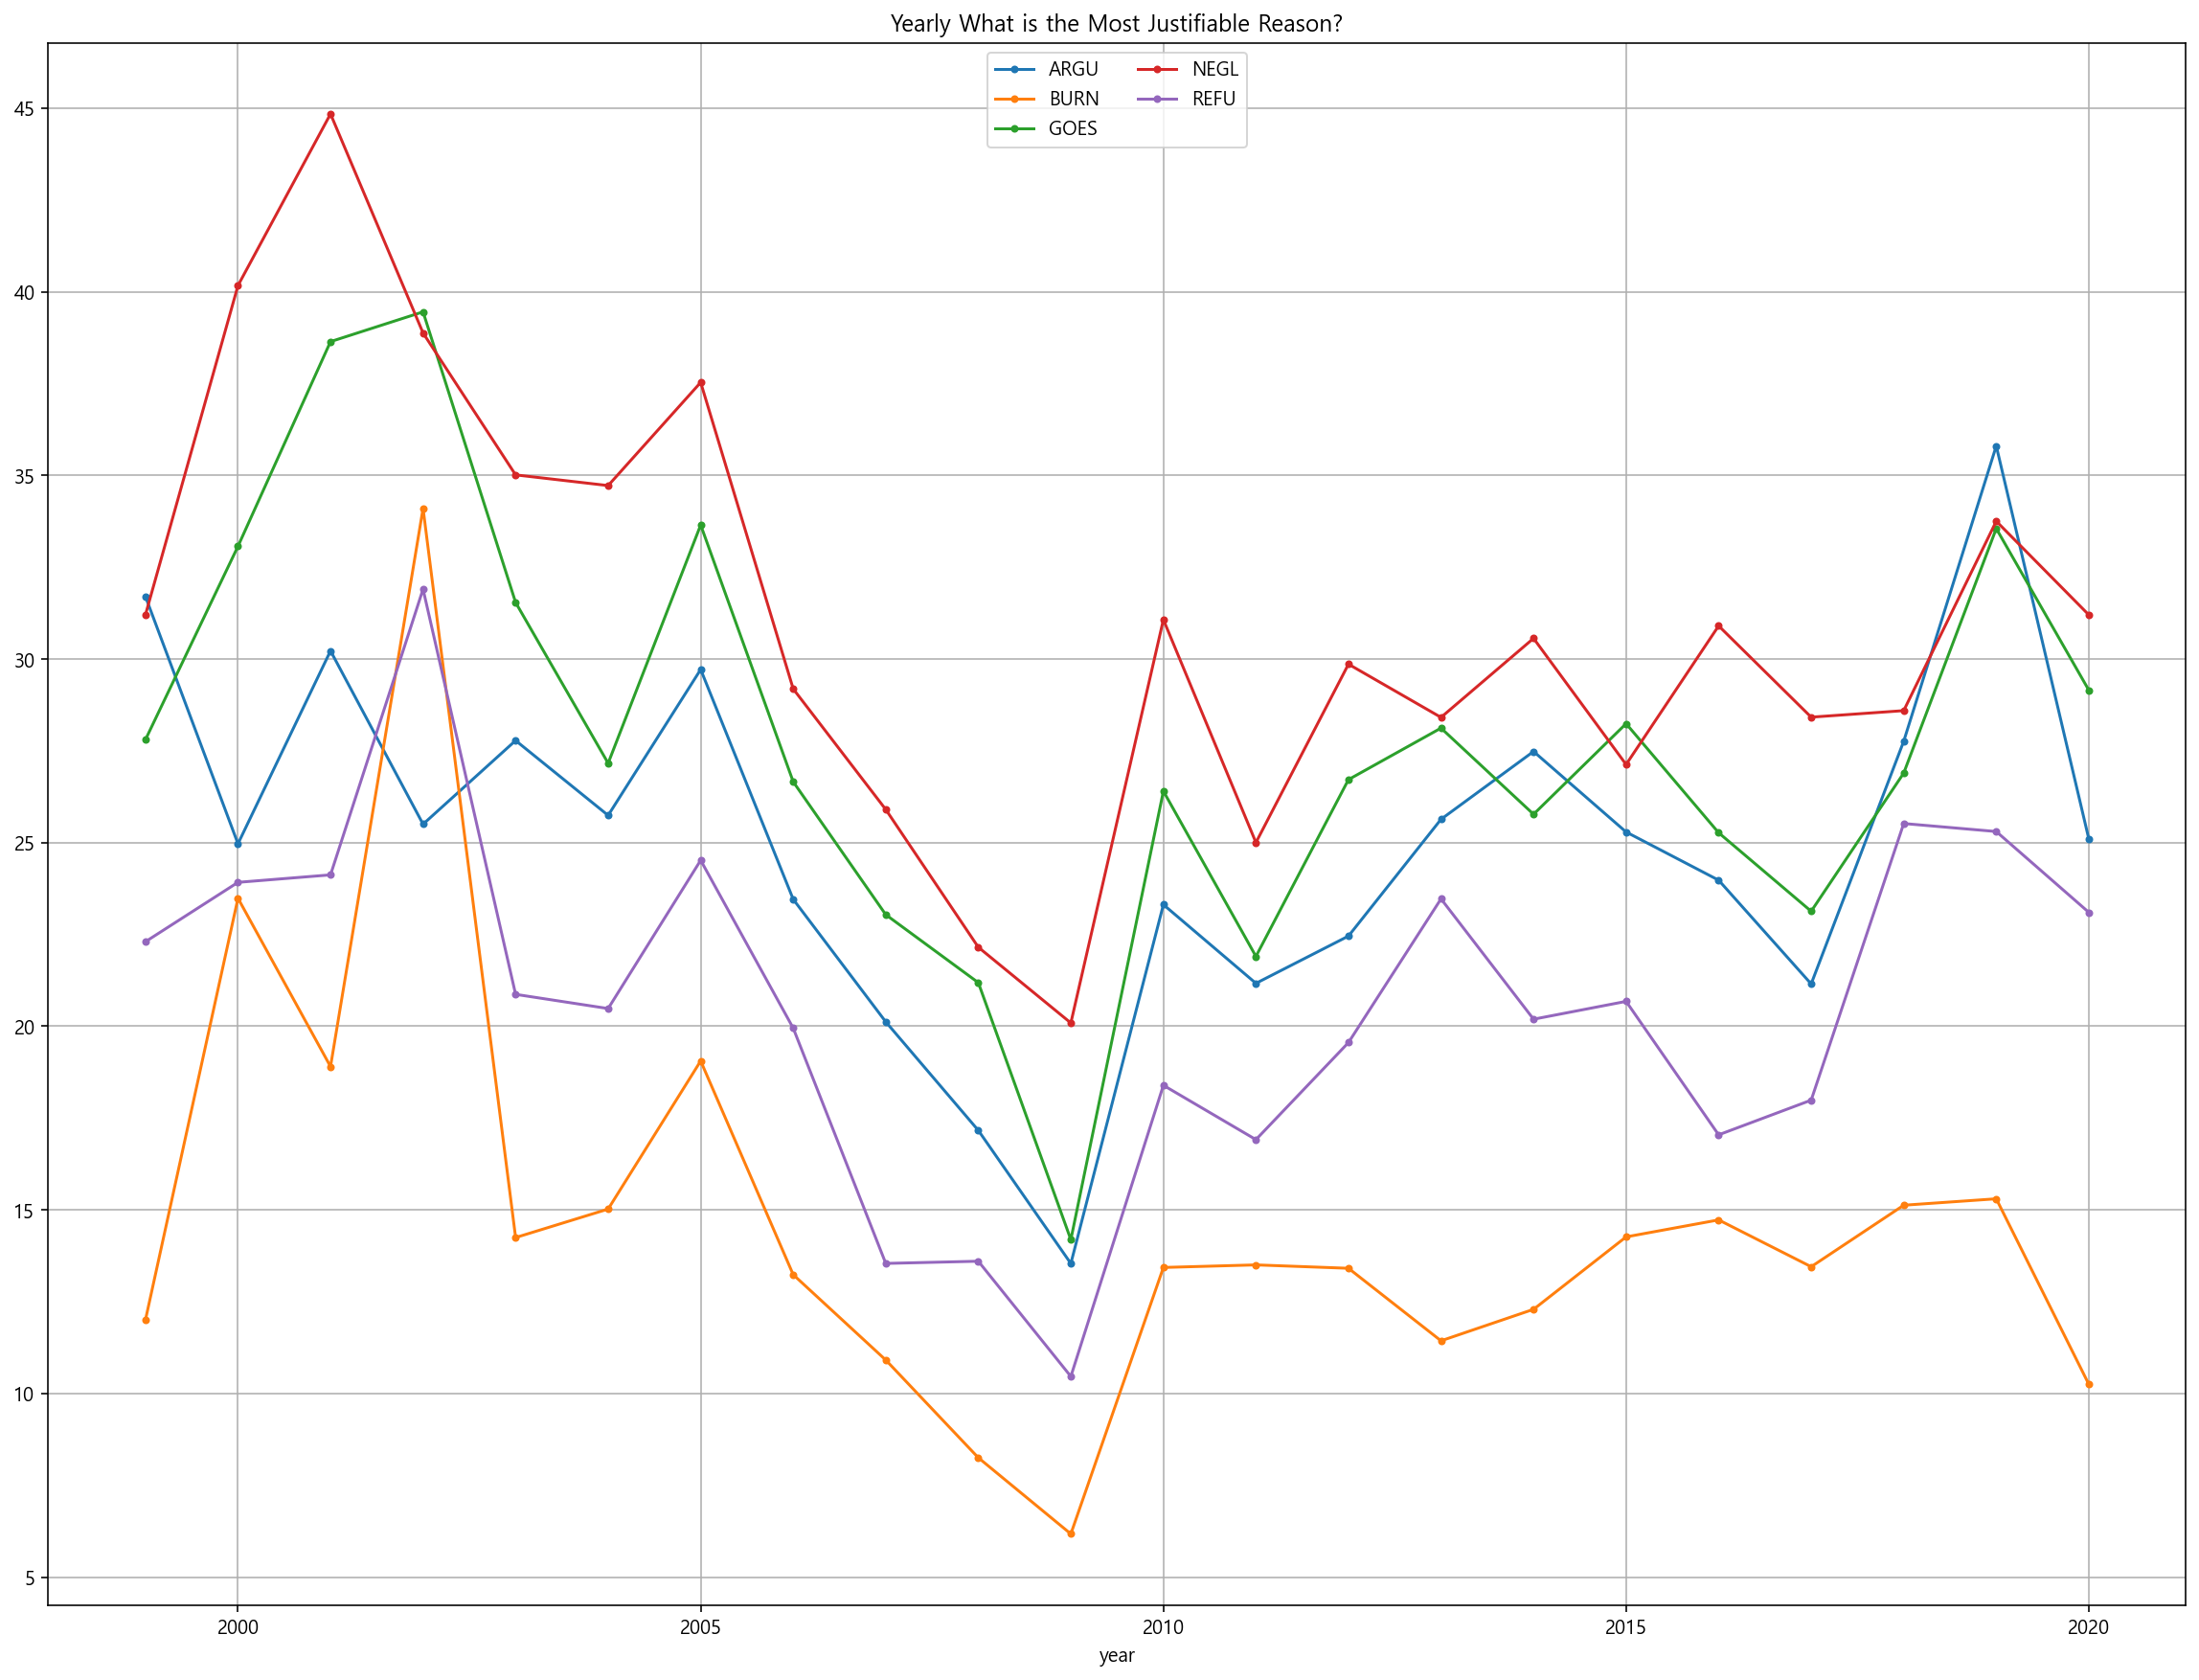

In [53]:
vawM.plot(x='year',figsize=(20,15), grid=True, marker='o', ms=3)
plt.title("Yearly What is the Most Justifiable Reason?")
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1))
# 범주 박스 가운데로
plt.show()

#### 사유는 아이를 무시했을 때 폭력이 정당화 된다고 답한 것이 가장 높았으며, 대체적으로 요리를 태웠을 때 폭력이 정당화 된다고 답한 것이 가장 낮은 것을 알 수 있음 (약간 의외의 결과?)

## 그렇다면, 나라나 대륙과 정당화 사유간에도 연관관계가 있지 않을까?

In [54]:
vawEC = pd.DataFrame(vawE[['id','region']])
vawEC.columns=['economy','region']
vawEC

,economy,region
2,AFG,SAS
4,AGO,SSF
5,ALB,ECS
10,ARM,ECS
15,AZE,ECS
...,...,...
257,VNM,EAS
262,YEM,MEA
263,ZAF,SSF
264,ZMB,SSF


In [55]:
vjDT = pd.merge(vawYDT, vawEC, left_on='economy', right_on='economy', how='left')
vjDT.columns = ['e', 't', 'A', 'B', 'G', 'N', 'R', 'r']
vjDT

,e,t,A,B,G,N,R,r
0,AFG,2015,59.2,18.2,66.9,48.4,33.4,SAS
1,AGO,2016,15.2,10.5,14.5,16.3,11.5,SSF
2,ALB,2005,8.7,3.1,17.0,19.6,8.7,ECS
3,ALB,2009,12.1,4.4,18.6,21.7,8.9,ECS
4,ALB,2018,1.8,0.8,3.7,5.2,0.9,ECS
...,...,...,...,...,...,...,...,...
191,ZMB,2018,32.2,21.3,26.0,31.3,29.5,SSF
192,ZWE,1999,31.7,12.0,27.8,31.2,22.3,SSF
193,ZWE,2006,26.0,12.2,33.0,30.2,24.3,SSF
194,ZWE,2011,15.6,7.5,22.3,21.4,16.9,SSF


In [56]:
abgDT = pd.pivot_table(vjDT.iloc[:,2:], index= ['r'], aggfunc=np.mean)
abgDT.columns=['ARGU', 'BURN', 'GOES', 'NEGL', 'REFU']
abgDT

,ARGU,BURN,GOES,NEGL,REFU
r,,,,,
EAS,19.600000,11.643750,26.735294,34.558824,12.205882
ECS,15.726923,7.465385,16.891667,19.534615,8.734615
LCN,3.404000,3.204000,5.688000,8.616000,2.776000
MEA,18.711111,15.400000,28.988889,30.522222,30.060000
SAS,21.764286,9.369231,19.413333,22.566667,12.286667
SSF,33.214706,19.494118,35.647115,38.824038,28.886538


## 3차 시각화 : 대륙과 폭력 종류 별 비율의 평균 상관관계 히트맵

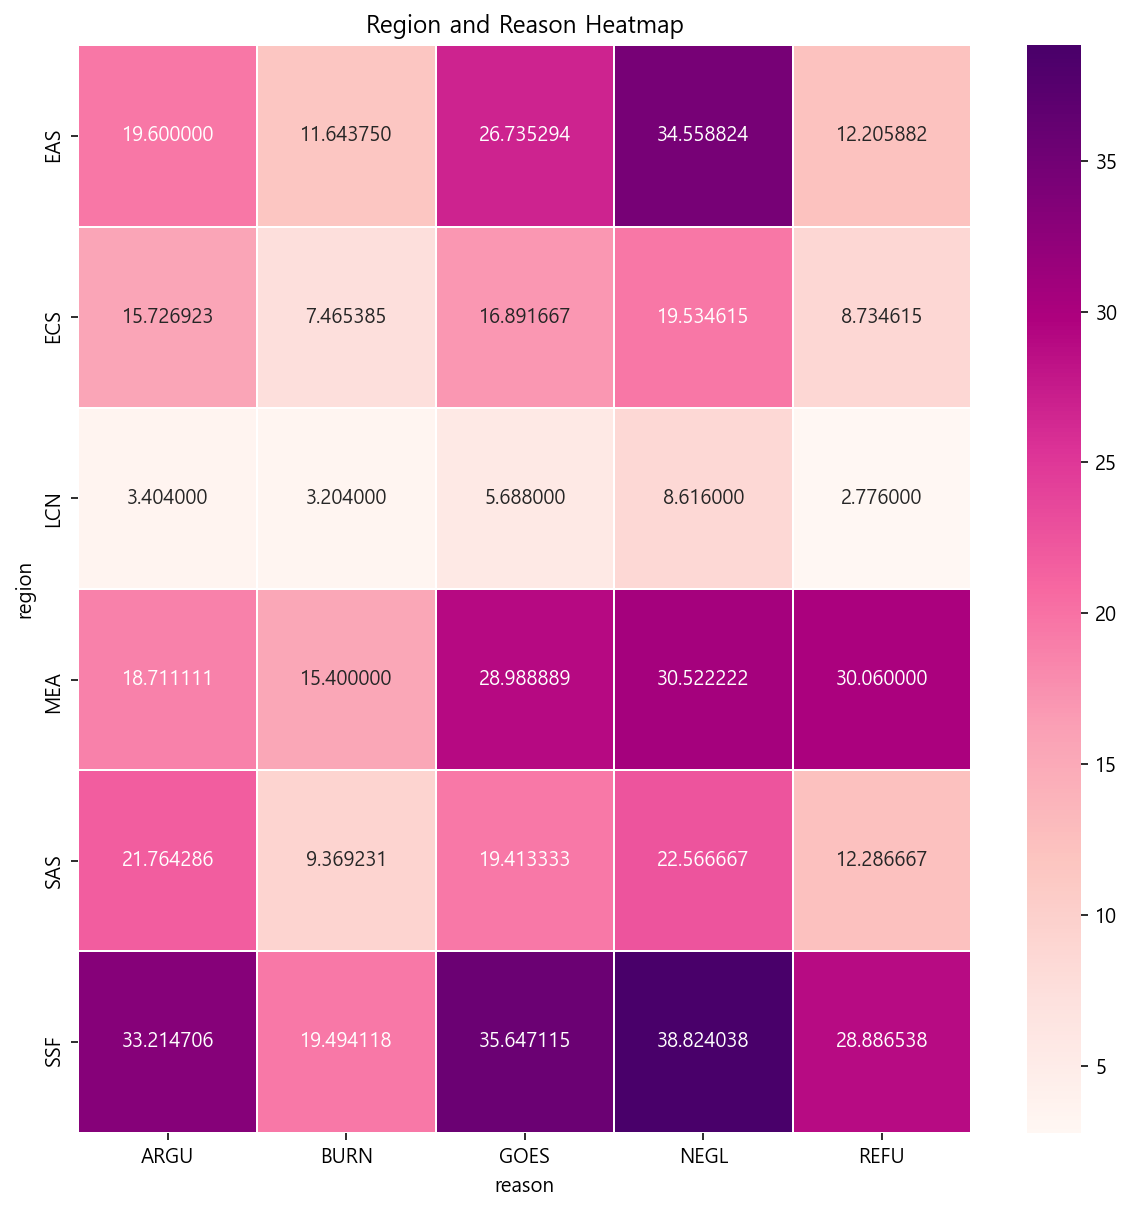

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(abgDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('Region and Reason Heatmap')
plt.xlabel('reason')
plt.ylabel('region')
plt.show()

In [58]:
abgDTN = abgDT / abgDT.max()
abgDTN
### 좀더 편하게 보기 위해 가장 큰 값으로 나눠서 정규화

,ARGU,BURN,GOES,NEGL,REFU
r,,,,,
EAS,0.590100,0.597296,0.749999,0.890140,0.406051
ECS,0.473493,0.382956,0.473858,0.503158,0.290573
LCN,0.102485,0.164357,0.159564,0.221924,0.092349
MEA,0.563338,0.789982,0.813218,0.786168,1.000000
SAS,0.655261,0.480618,0.544598,0.581255,0.408738
SSF,1.000000,1.000000,1.000000,1.000000,0.960963


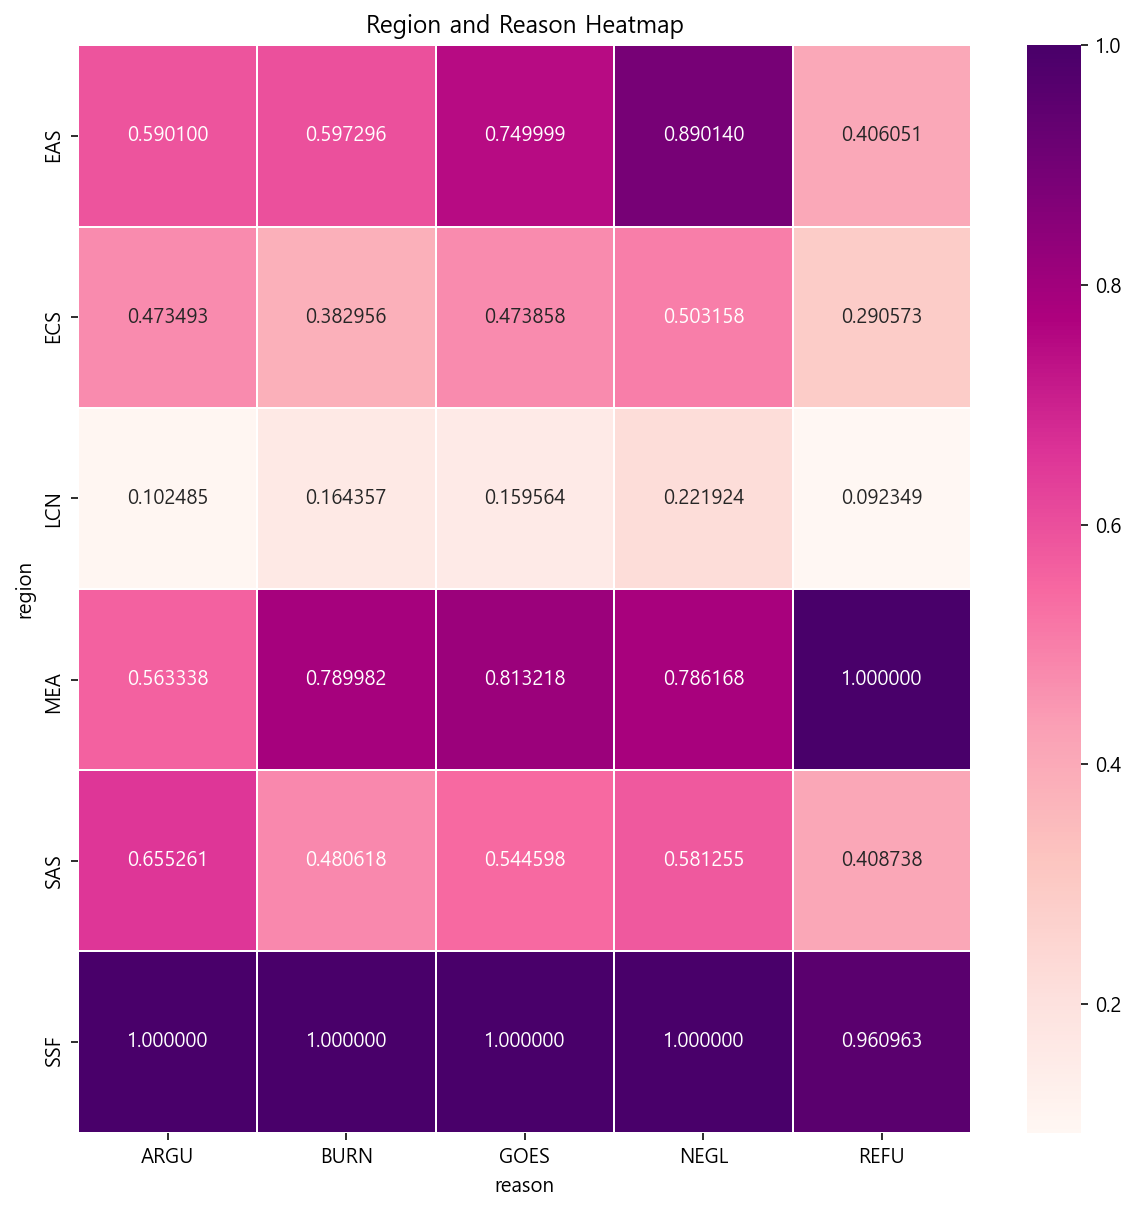

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(abgDTN, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('Region and Reason Heatmap')
plt.xlabel('reason')
plt.ylabel('region')
plt.show()

LCN:Latin America & Caribbean이 어느 부분에서든 가장 폭력이
<br>
정당화 되어서는 안된다고 생각하고,
<br>
SSF:Sub-Saharan Africa가 거의 가장 높음
<br>
MEA:Middle East & North Africa는
<br>
성관계 거부 분야에서만 다른 대륙과 비교시 가장 높음

## 3-2 시각화 : 각 나라별 각 이유별 상위 10개분포

In [60]:
vawcE = vawE.loc[:,['id','name']]
vawcE.columns=['e', 'country']
vawcE

,e,country
2,AFG,Afghanistan
4,AGO,Angola
5,ALB,Albania
10,ARM,Armenia
15,AZE,Azerbaijan
...,...,...
257,VNM,Vietnam
262,YEM,"Yemen, Rep."
263,ZAF,South Africa
264,ZMB,Zambia


In [61]:
vJRDT=vjDT.rename(columns={'r':'region'})
vJRDT

,e,t,A,B,G,N,R,region
0,AFG,2015,59.2,18.2,66.9,48.4,33.4,SAS
1,AGO,2016,15.2,10.5,14.5,16.3,11.5,SSF
2,ALB,2005,8.7,3.1,17.0,19.6,8.7,ECS
3,ALB,2009,12.1,4.4,18.6,21.7,8.9,ECS
4,ALB,2018,1.8,0.8,3.7,5.2,0.9,ECS
...,...,...,...,...,...,...,...,...
191,ZMB,2018,32.2,21.3,26.0,31.3,29.5,SSF
192,ZWE,1999,31.7,12.0,27.8,31.2,22.3,SSF
193,ZWE,2006,26.0,12.2,33.0,30.2,24.3,SSF
194,ZWE,2011,15.6,7.5,22.3,21.4,16.9,SSF


In [62]:
vnjDT = pd.merge(vJRDT, vawcE, left_on='e', right_on='e', how='left')
vnjDT

,e,t,A,B,G,N,R,region,country
0,AFG,2015,59.2,18.2,66.9,48.4,33.4,SAS,Afghanistan
1,AGO,2016,15.2,10.5,14.5,16.3,11.5,SSF,Angola
2,ALB,2005,8.7,3.1,17.0,19.6,8.7,ECS,Albania
3,ALB,2009,12.1,4.4,18.6,21.7,8.9,ECS,Albania
4,ALB,2018,1.8,0.8,3.7,5.2,0.9,ECS,Albania
...,...,...,...,...,...,...,...,...,...
191,ZMB,2018,32.2,21.3,26.0,31.3,29.5,SSF,Zambia
192,ZWE,1999,31.7,12.0,27.8,31.2,22.3,SSF,Zimbabwe
193,ZWE,2006,26.0,12.2,33.0,30.2,24.3,SSF,Zimbabwe
194,ZWE,2011,15.6,7.5,22.3,21.4,16.9,SSF,Zimbabwe


In [63]:
a10 = vnjDT.sort_values('A', ascending=False).loc[:,['e','t','region','A', 'country']].iloc[:10,:]
b10 = vnjDT.sort_values('B', ascending=False).loc[:,['e','t','region','B', 'country']].iloc[:10,:]
g10 = vnjDT.sort_values('G', ascending=False).loc[:,['e','t','region','G', 'country']].iloc[:10,:]
n10 = vnjDT.sort_values('N', ascending=False).loc[:,['e','t','region','N', 'country']].iloc[:10,:]
r10 = vnjDT.sort_values('R', ascending=False).loc[:,['e','t','region','R', 'country']].iloc[:10,:]
### 강 항목별 최댓값 가지는 나라 10개, 년도, 대륙 뽑아낸 데이터 프레임

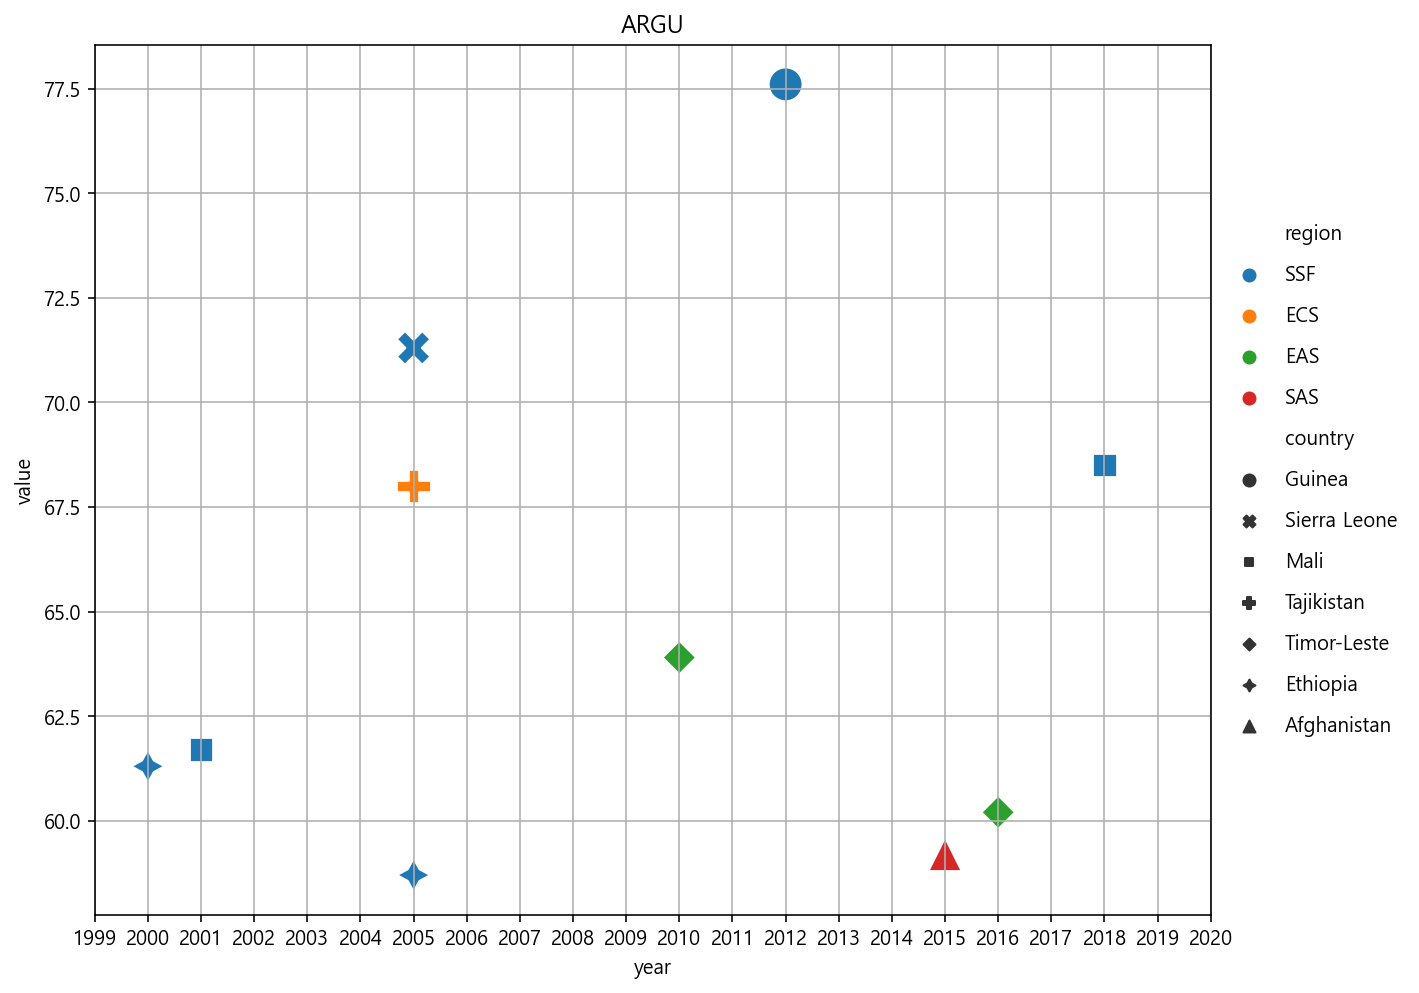

In [64]:
import math
temp_year = [1999, 2020]
ytempint = range(min(temp_year), math.ceil(max(temp_year))+1)
### x축이 소수점 연도로 나오는 문제 해결

plt.figure(figsize=(10,8))

sns.scatterplot(data=a10, x='t',y='A', hue='region', style='country',  s=300)

plt.xlabel('year')
plt.ylabel('value')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ARGU")
plt.grid(True)
plt.xticks(ytempint) 
plt.show()
### Guinea, SSF, 2012 max

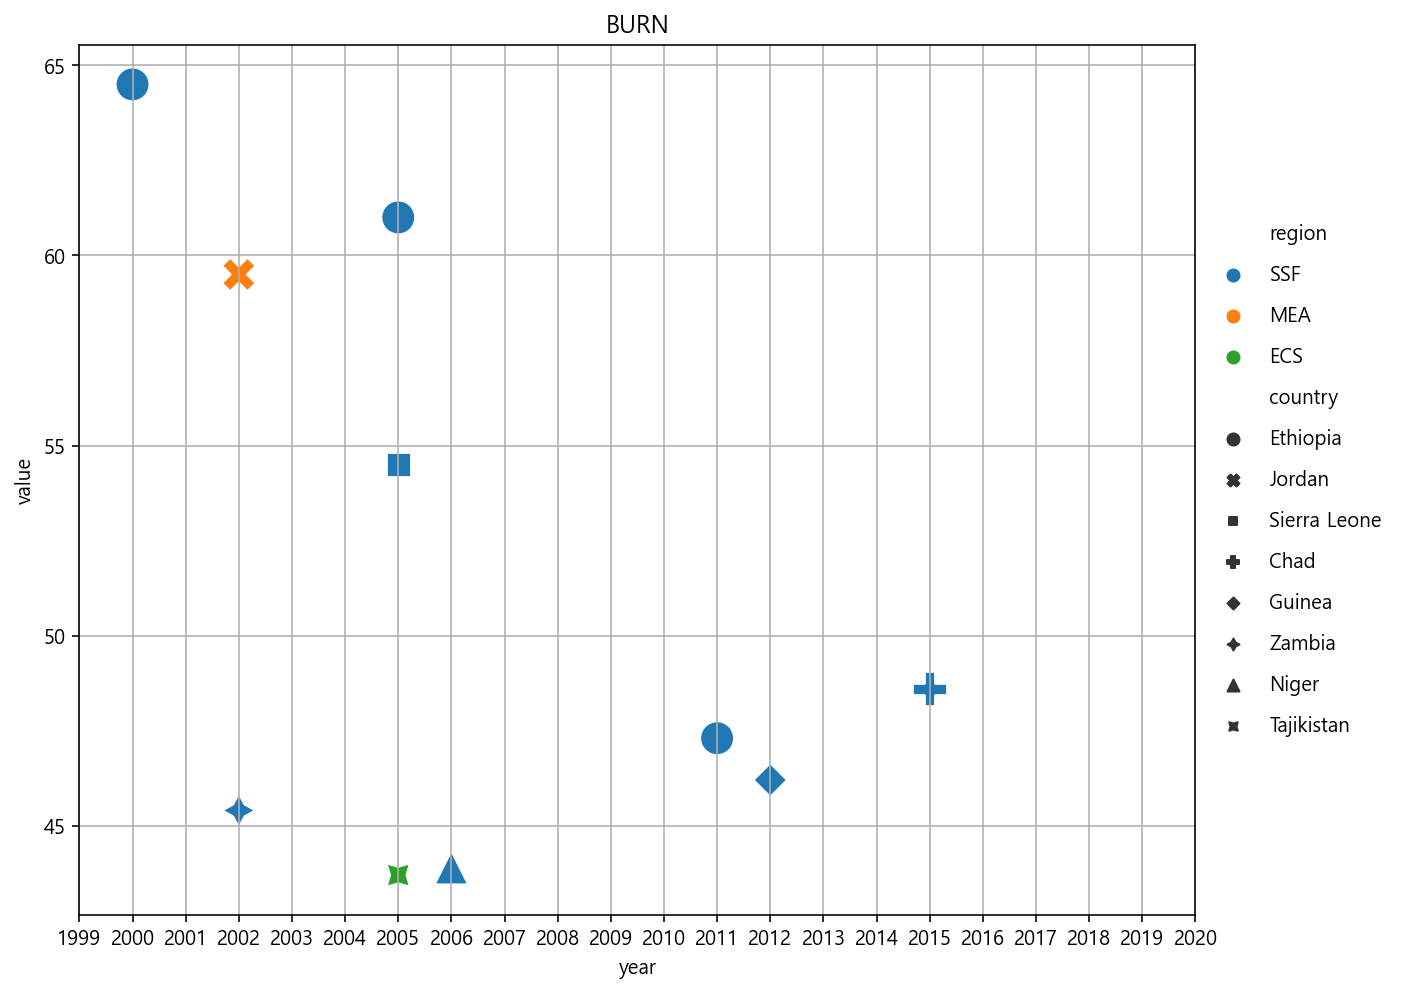

In [65]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=b10, x='t',y='B', hue='region', style='country',  s=300)

plt.xlabel('year')
plt.ylabel('value')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("BURN")
plt.grid(True)
plt.xticks(ytempint) 
plt.show()
### 2000, Ethiopia, SSF max

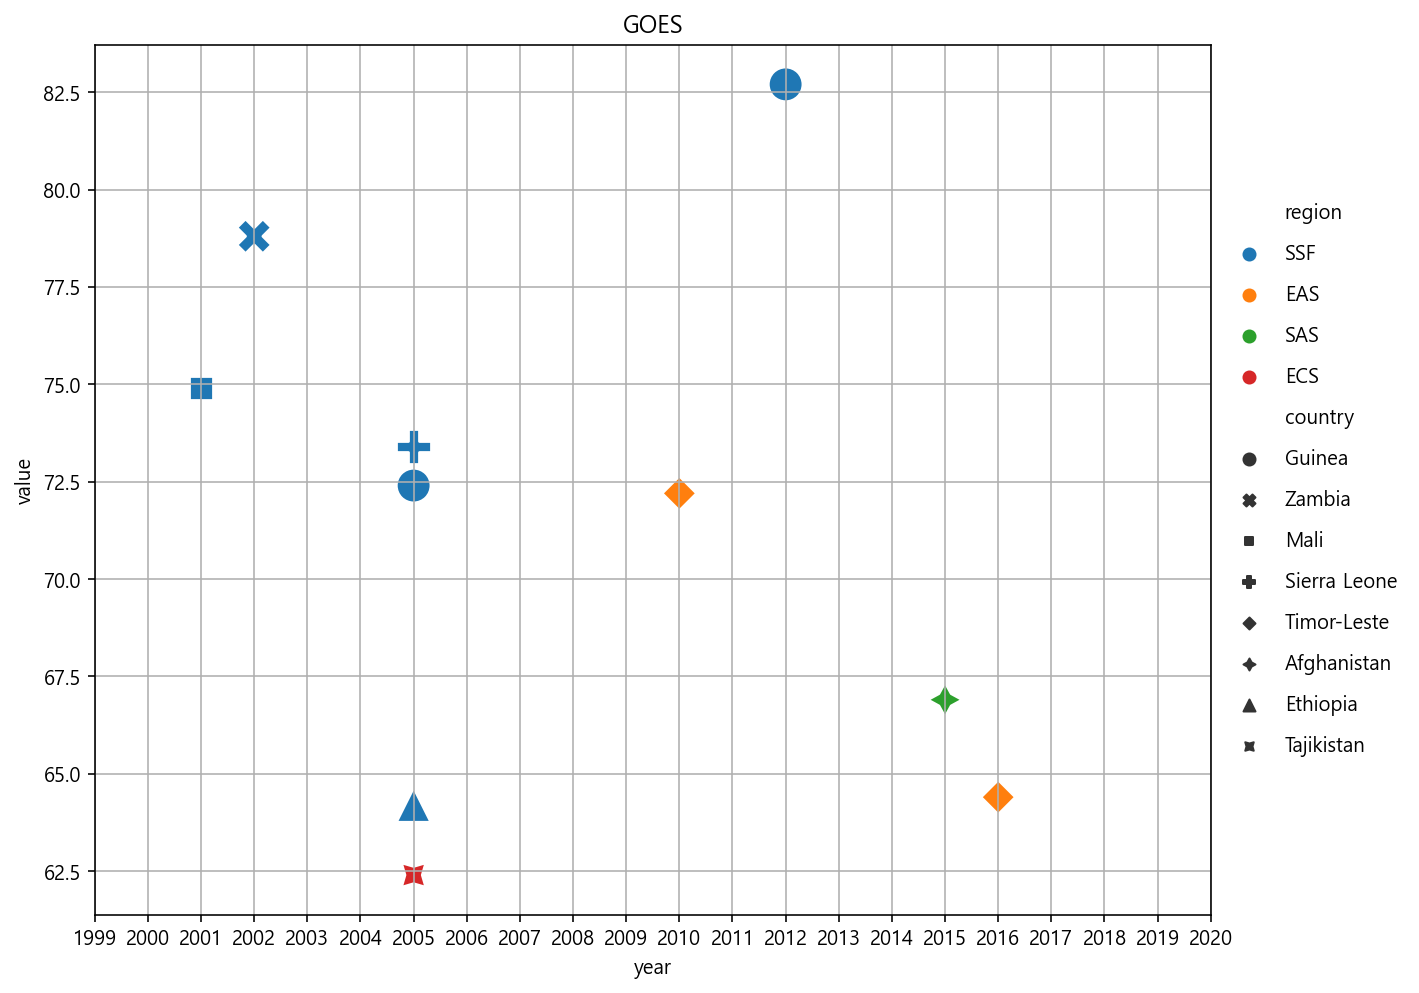

In [66]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=g10, x='t',y='G', hue='region', style='country',  s=300)

plt.xlabel('year')
plt.ylabel('value')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("GOES")
plt.grid(True)
plt.xticks(ytempint) 
plt.show()
### 2012, Guinea, SSF max

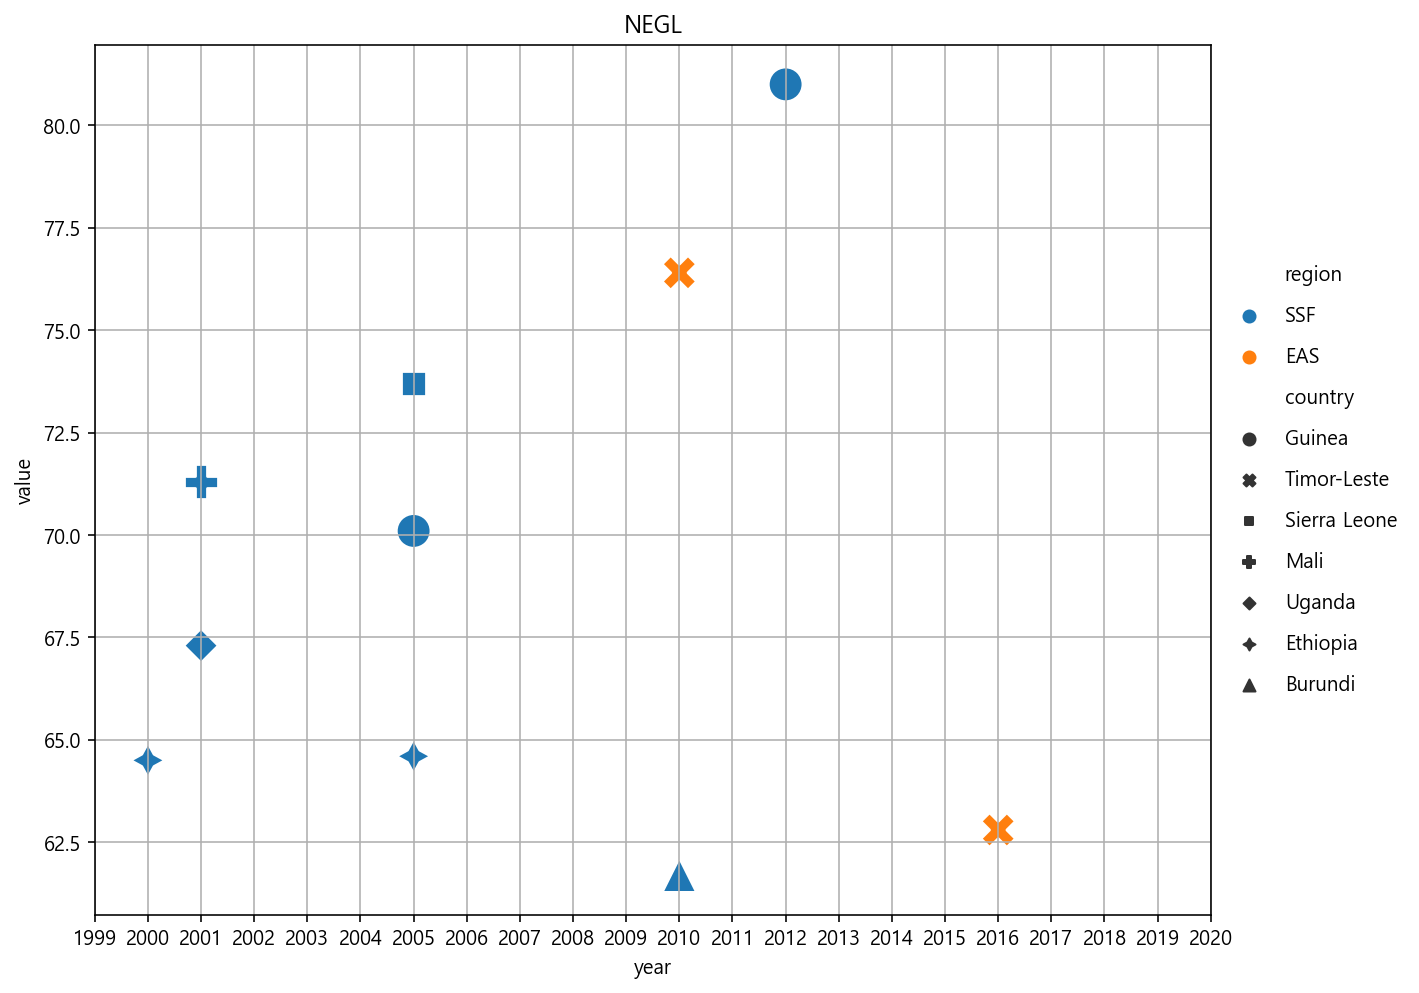

In [67]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=n10, x='t',y='N', hue='region', style='country',  s=300)

plt.xlabel('year')
plt.ylabel('value')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("NEGL")
plt.grid(True)
plt.xticks(ytempint) 
plt.show()
### 2012, Guinea, SSF max

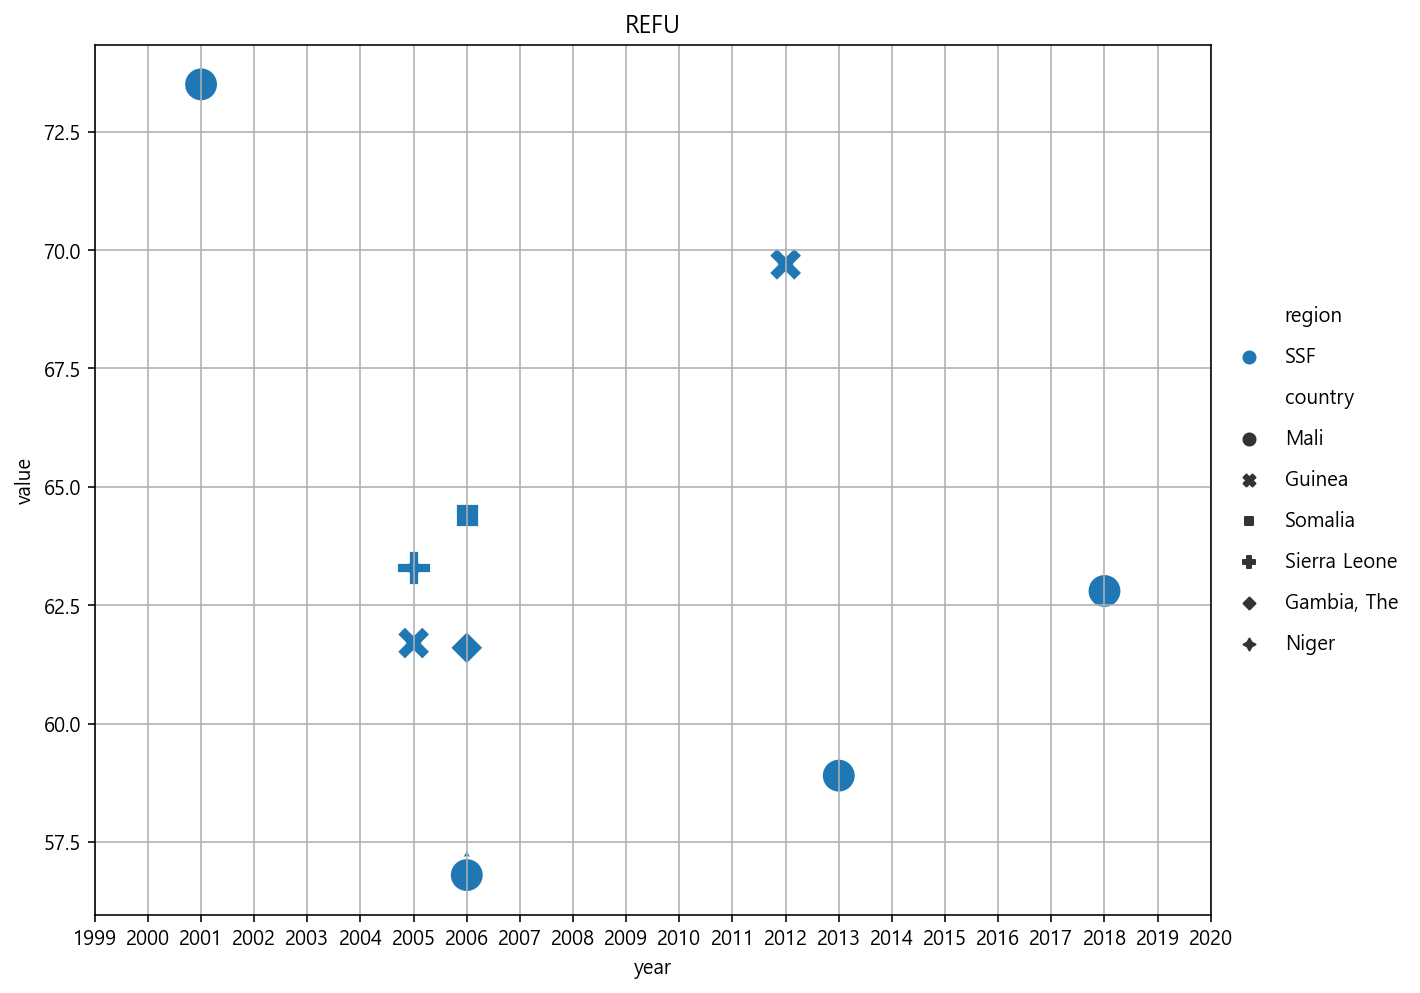

In [68]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=r10, x='t',y='R', hue='region', style='country',  s=300)

plt.xlabel('year')
plt.ylabel('value')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("REFU")
plt.grid(True)
plt.xticks(ytempint) 
plt.show()
### 2001, Mali, SSF max

SSF가 조사 대상에 많아 편중될 수 있다는 점을 감안해도, <br>
가장 상위일 때 수치가 매우 높은 것 같음.
또한, Guinea가 많이 포함 되어 있는 것 같음.<br>
상위 분포일 때가<br>
꽤 최근인 2018년도에도 있다는 점이 특이함.

In [69]:
vjheat = vjDT.groupby(['t','r']).mean()
vjheat

A          B          G          N          R
t    r                                                         
1999 SSF  31.700000  12.000000  27.800000  31.200000  22.300000
2000 ECS  24.050000  13.350000  30.100000  35.350000  13.750000
     LCN  10.100000  10.800000  28.800000  27.600000  14.000000
     SSF  30.533333  34.466667  36.466667  47.566667  34.000000
2001 LCN   4.400000   4.500000   5.800000   9.400000   2.800000
...             ...        ...        ...        ...        ...
2018 MEA   5.900000   2.400000   7.200000   6.700000        NaN
     SAS  22.650000   9.750000  19.600000  18.800000  15.150000
     SSF  34.042857  17.857143  31.742857  33.471429  31.057143
2019 SSF  35.800000  15.300000  33.550000  33.750000  25.300000
2020 SSF  25.100000  10.250000  29.150000  31.200000  23.100000

[81 rows x 5 columns]

In [72]:
vavgDT = vawYDT.copy()
vavgDT['avg'] = vavgDT.iloc[:,2:].mean(axis=1)
vavgDT = vavgDT.loc[:,['economy','time','avg']]
vavgDT

,economy,time,avg
0,AFG,2015,45.22
1,AGO,2016,13.60
2,ALB,2005,11.42
3,ALB,2009,13.14
4,ALB,2018,2.48
...,...,...,...
191,ZMB,2018,28.06
192,ZWE,1999,25.00
193,ZWE,2006,25.14
194,ZWE,2011,16.74


In [74]:
vJDT = pd.merge(vavgDT, vawEC, left_on='economy', right_on='economy', how='left')
vJDT

,economy,time,avg,region
0,AFG,2015,45.22,SAS
1,AGO,2016,13.60,SSF
2,ALB,2005,11.42,ECS
3,ALB,2009,13.14,ECS
4,ALB,2018,2.48,ECS
...,...,...,...,...
191,ZMB,2018,28.06,SSF
192,ZWE,1999,25.00,SSF
193,ZWE,2006,25.14,SSF
194,ZWE,2011,16.74,SSF


In [75]:
vJSDT = vJDT.sort_values(by=['time'], axis=0)
vJSDT
### 연도별 정렬

,economy,time,avg,region
192,ZWE,1999,25.00,SSF
142,RWA,2000,32.08,SSF
45,ETH,2000,59.48,SSF
5,ARM,2000,14.54,ECS
66,HTI,2000,18.26,LCN
...,...,...,...,...
153,SEN,2018,30.58,SSF
158,SLE,2019,29.54,SSF
154,SEN,2019,27.94,SSF
59,GMB,2020,27.92,SSF


In [76]:
EduDT = wb.data.DataFrame(['SE.TER.CUAT.BA.MA.ZS', 'SE.TER.CUAT.BA.FE.ZS'], skipBlanks=True, columns='series')
EduDT
#### 남녀 교육 데이터

SE.TER.CUAT.BA.FE.ZS  SE.TER.CUAT.BA.MA.ZS
economy time                                              
AGO     YR2014              2.000610              3.342450
ALB     YR2011             11.499700             12.523860
        YR2012             12.395000             13.458770
AND     YR2004             15.428040             17.114321
        YR2005             16.368019             17.946690
...                              ...                   ...
WSM     YR2001              3.402240              4.444810
ZAF     YR2015              5.715760              6.452410
        YR2017              8.210880              8.282770
        YR2019              2.578780             10.487800
ZWE     YR2017              2.466430              4.143930

[514 rows x 2 columns]

## 4차 시각화 : 대륙별로 년도별 남녀 학사 비율은 어떤 양상을 보일까?

In [77]:
def countryM(df):
    return list(set(map(lambda x: x[0], df.index)))

In [78]:
c = countryM(EduDT)
### 조사된 나라목록

In [79]:
eduE = ecoR[ecoR.id.isin(c)]
eduE

,id,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
4,AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
5,ALB,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
6,AND,Andorra,False,1.5218,42.50750,ECS,,LNX,HIC,Andorra la Vella
8,ARE,United Arab Emirates,False,54.3705,24.47640,MEA,,LNX,HIC,Abu Dhabi
10,ARM,Armenia,False,44.5090,40.15960,ECS,ECA,IBD,UMC,Yerevan
...,...,...,...,...,...,...,...,...,...,...
254,VEN,"Venezuela, RB",False,-69.8371,9.08165,LCN,,IBD,INX,Caracas
257,VNM,Vietnam,False,105.8250,21.00690,EAS,EAP,IBD,LMC,Hanoi
260,WSM,Samoa,False,-171.7520,-13.83140,EAS,EAP,IDX,LMC,Apia
263,ZAF,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria


In [80]:
eduEC = pd.DataFrame(eduE[['id','region']])
eduEC.columns=['economy','region']
eduEC

,economy,region
4,AGO,SSF
5,ALB,ECS
6,AND,ECS
8,ARE,MEA
10,ARM,ECS
...,...,...
254,VEN,LCN
257,VNM,EAS
260,WSM,EAS
263,ZAF,SSF


In [81]:
ejDT = pd.merge(EduDT, eduEC, left_on='economy', right_on='economy', how='left')
ejDT

,economy,SE.TER.CUAT.BA.FE.ZS,SE.TER.CUAT.BA.MA.ZS,region
0,AGO,2.000610,3.342450,SSF
1,ALB,11.499700,12.523860,ECS
2,ALB,12.395000,13.458770,ECS
3,AND,15.428040,17.114321,ECS
4,AND,16.368019,17.946690,ECS
...,...,...,...,...
509,WSM,3.402240,4.444810,EAS
510,ZAF,5.715760,6.452410,SSF
511,ZAF,8.210880,8.282770,SSF
512,ZAF,2.578780,10.487800,SSF


In [82]:
eabgDT = pd.pivot_table(ejDT.iloc[:,1:], index= ['region'], aggfunc=np.mean)
eabgDT.columns=['F', 'M']
eabgDT

,F,M
region,,
EAS,20.671571,20.596040
ECS,21.791232,19.958077
LCN,12.688498,11.412755
MEA,22.092865,17.610823
NAC,32.218411,30.673740
SAS,4.813882,8.811853
SSF,1.799389,3.837921


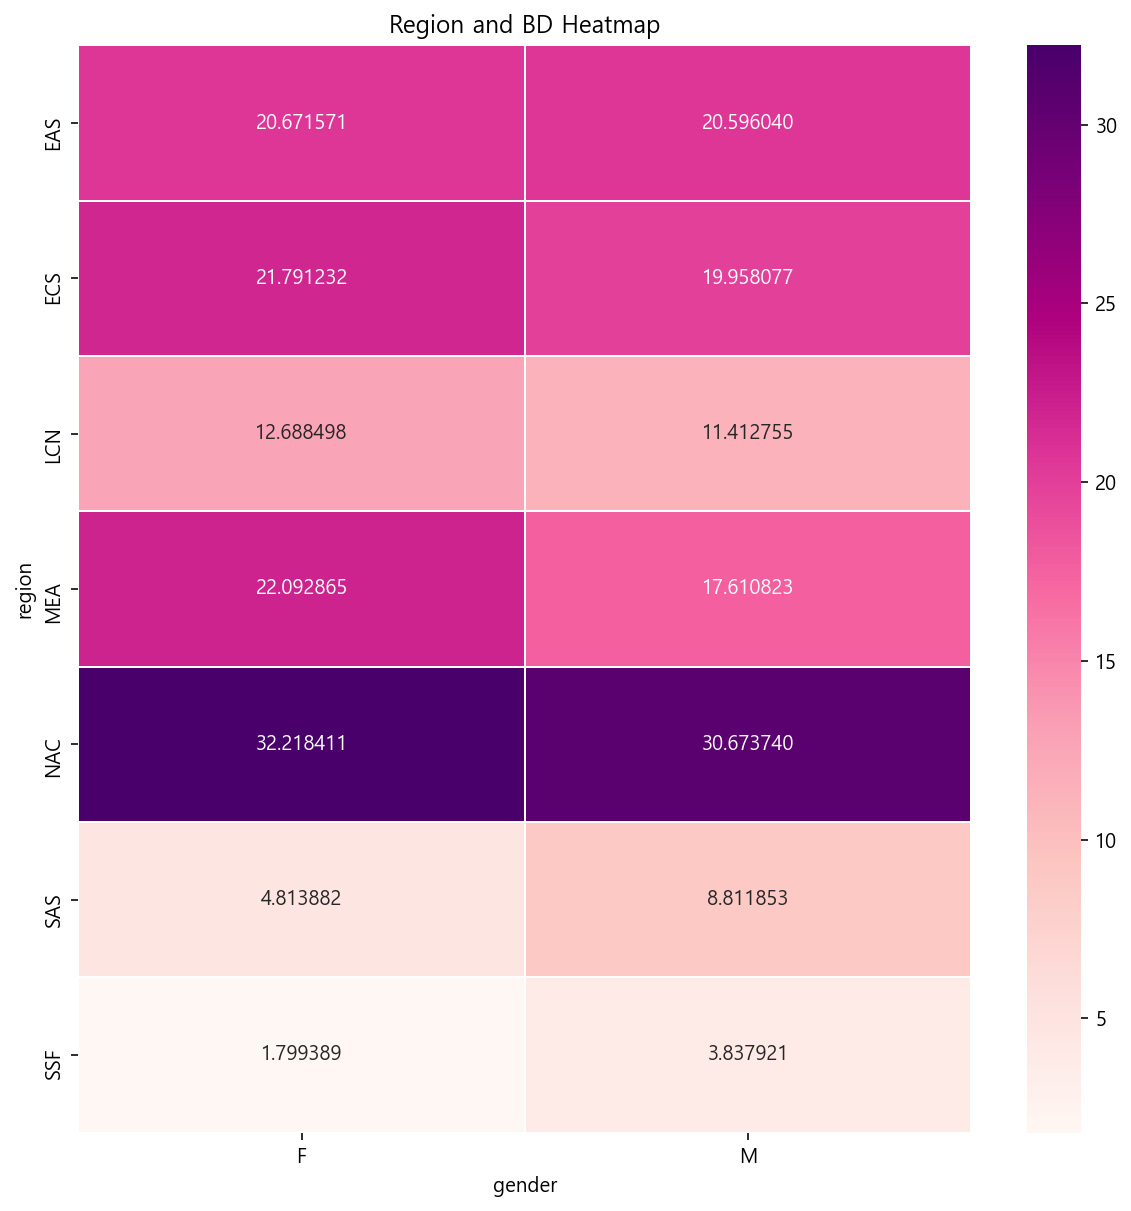

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(eabgDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('Region and BD Heatmap')
plt.xlabel('gender')
plt.ylabel('region')
plt.show()

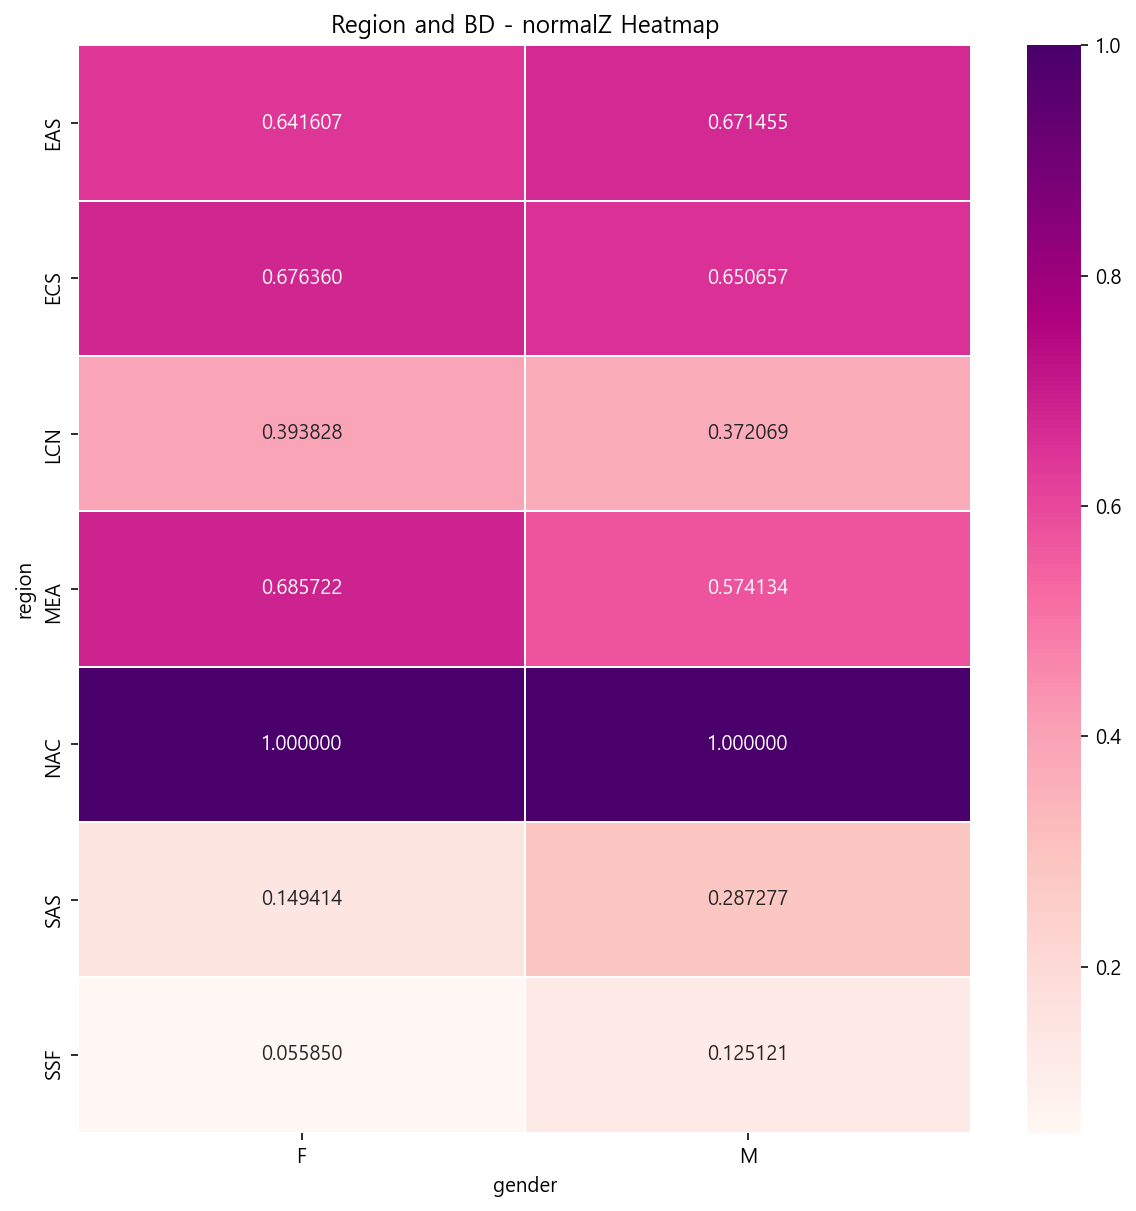

In [84]:
eabgDTN = eabgDT / eabgDT.max()
plt.figure(figsize=(10,10))
sns.heatmap(eabgDTN, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('Region and BD - normalZ Heatmap')
plt.xlabel('gender')
plt.ylabel('region')
plt.show()

EAS:East Asia & Pacific ECS:Europe & Central Asia LCN:Latin America & Caribbean MEA:Middle East & North Africa NAC:North America SAS:South Asia SSF:Sub-Saharan Africa WLD:World (아까데이터에 없는 것도 있음.)

#### 우선 간단하게 교육 데이터와 대륙 간의 관계를 보았을 때,
#### 아까 가장 폭력이 정당화 되던 SSF의 여성과 남성의 학사 취득율이 동시에 가장 적음. 

## 5차 시각화 : 연도별로 남녀 학사 비율은 어떤 양상을 보일까?

In [85]:
erDT = EduDT.reset_index()
erDT['time'] = timeToInt(erDT)
etDT = erDT.groupby('time').mean()
### 남녀 학사비율 연도별 시간으로 평균내기
etDT.columns = ['F', 'M']

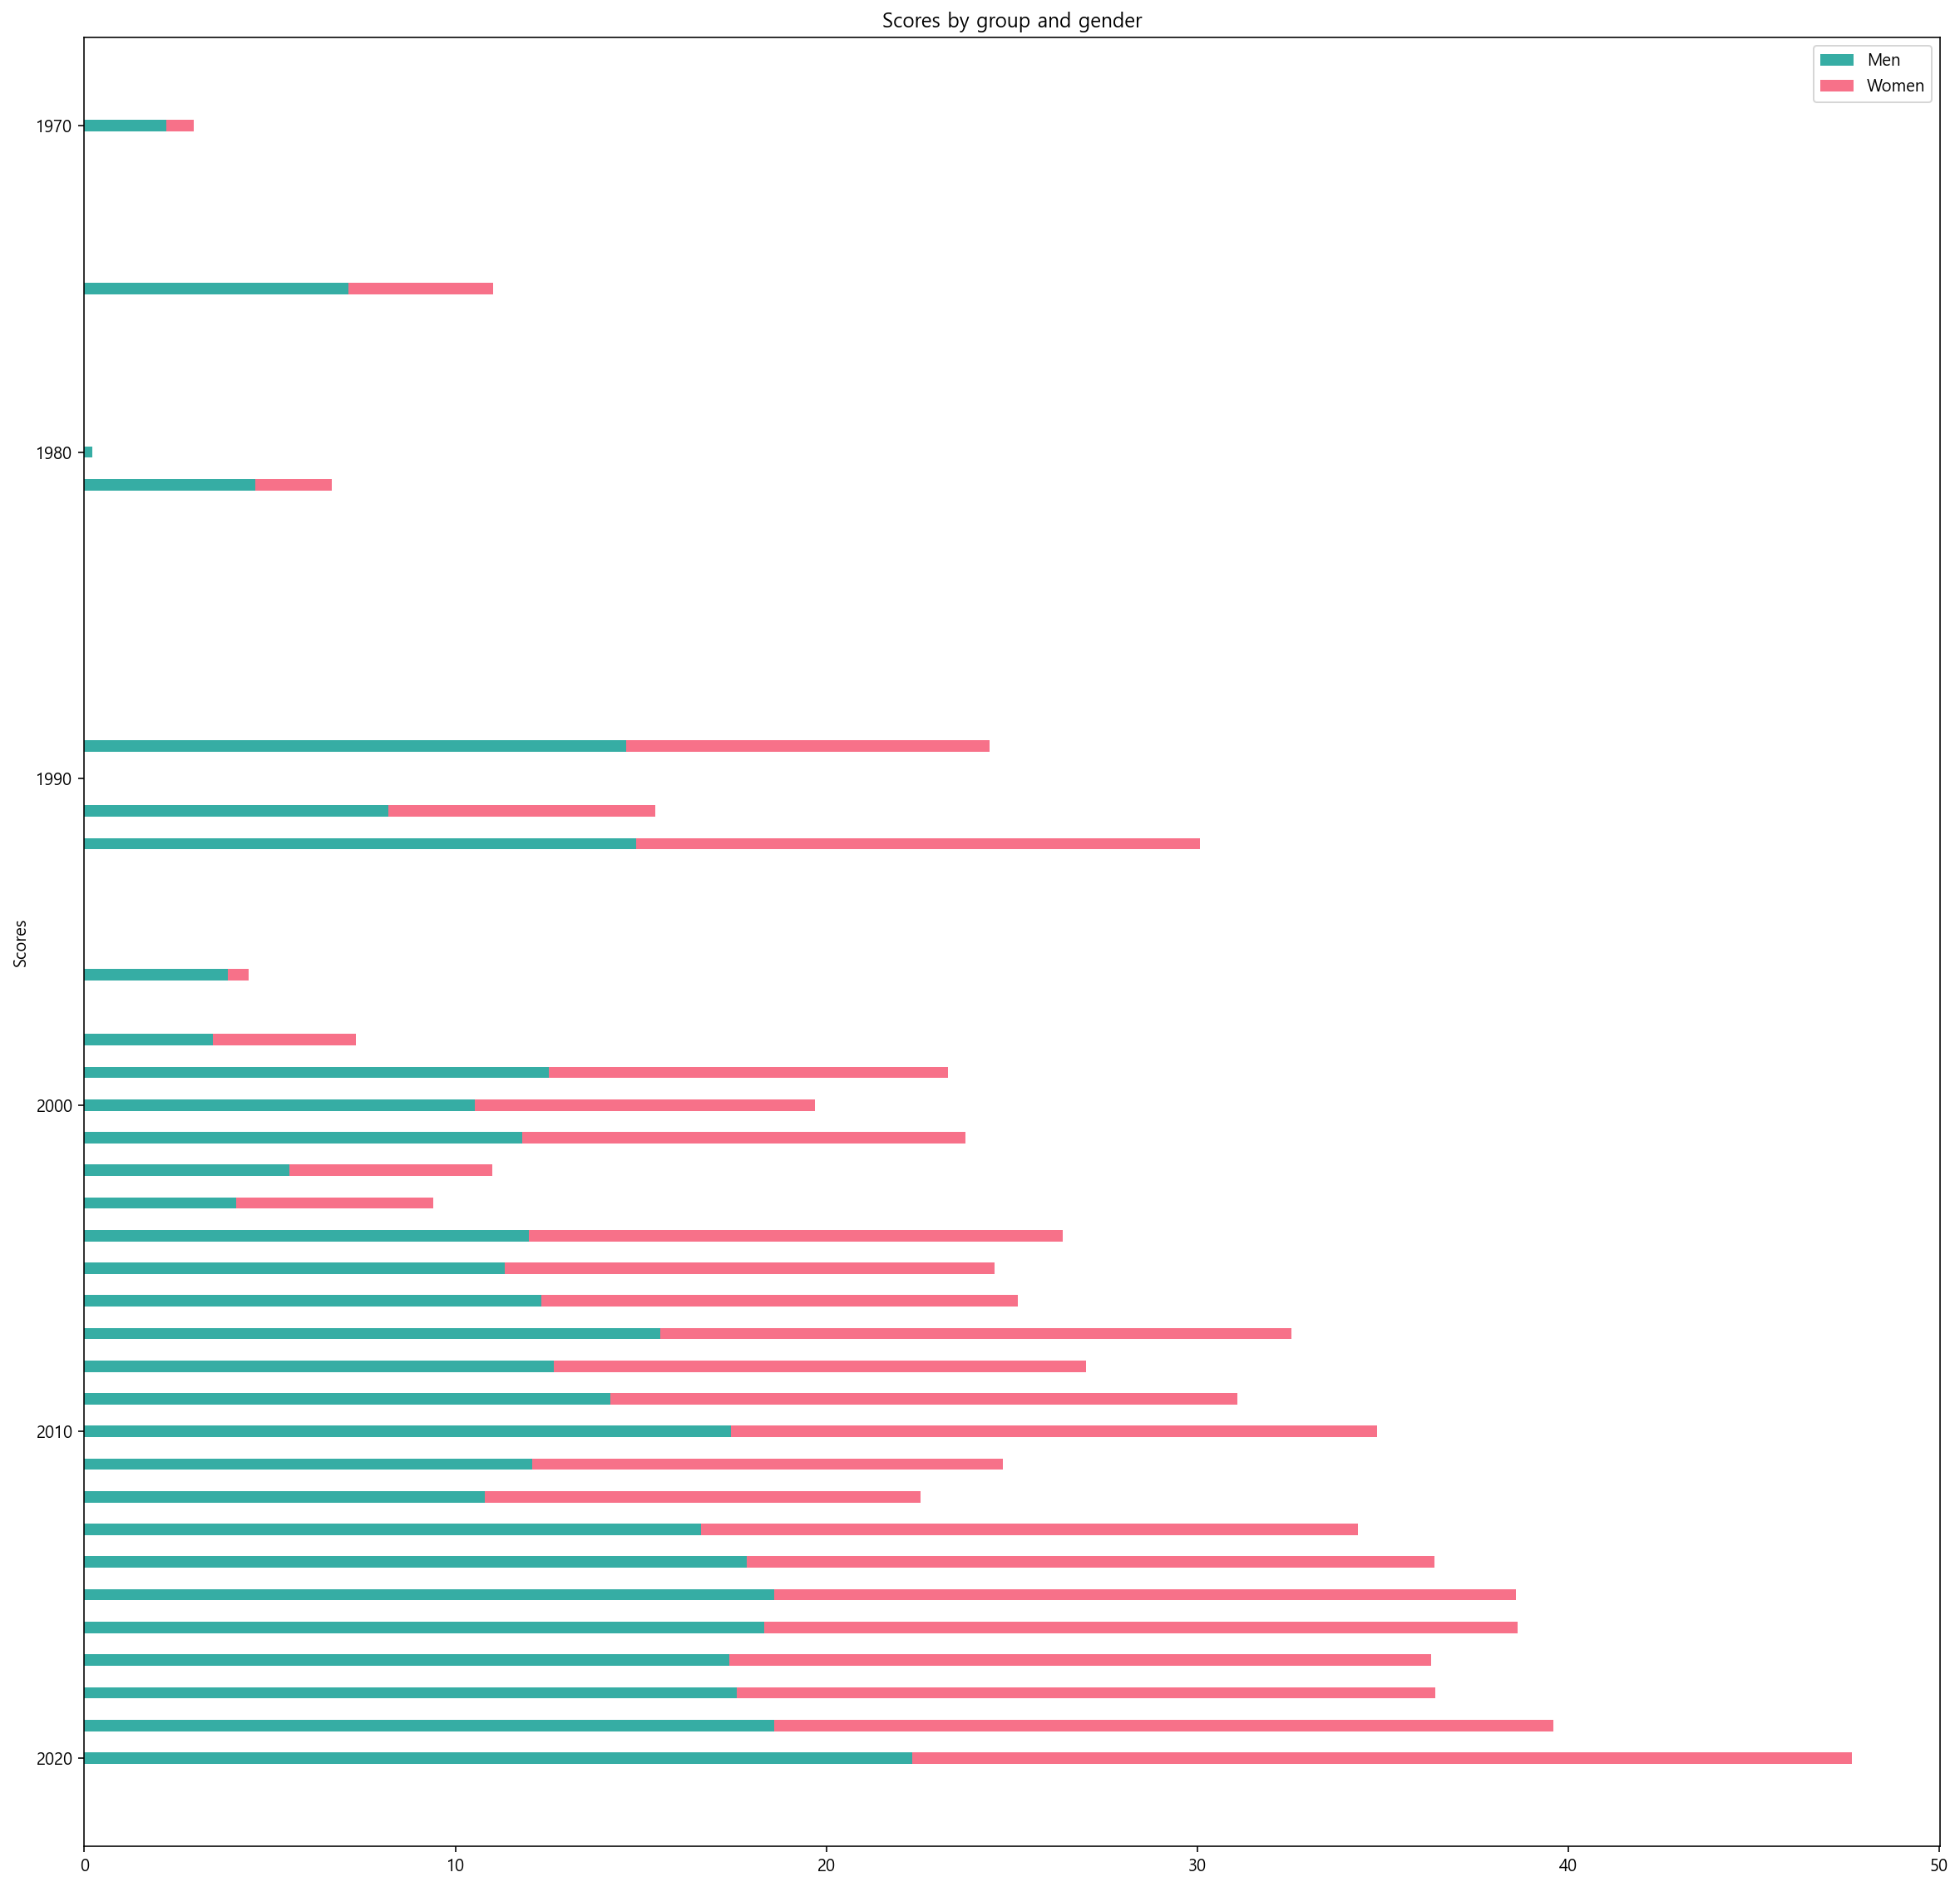

In [86]:
fig, ax = plt.subplots(figsize=(20,20))
colors = sns.color_palette("husl",2)

labels = list(etDT.index)
men_means = list(etDT.loc[:,'M'])
women_means = list(etDT.loc[:,'F'])
width = 0.35  

ax.barh(labels, men_means, width, label='Men', color = colors[1])
ax.barh(labels, women_means, width, left=men_means,
       label='Women', color = colors[0])
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()
plt.gca().invert_yaxis()
### y축 inverse

plt.show()

#### 현대로 올수록 여성의 학사 취득율이 높아지고 있다는 점이 신기했음.

## 6차 시각화 : 마지막으로, 원래 보기로 한 학사 취득율과 여성 자신의 폭력 정당화와의 관계성

In [88]:
vawEduDT = wb.data.DataFrame(['SG.VAW.ARGU.ZS', 'SG.VAW.BURN.ZS',\
    'SG.VAW.GOES.ZS', 'SG.VAW.NEGL.ZS', 'SG.VAW.REFU.ZS',\
    'SE.TER.CUAT.BA.MA.ZS', 'SE.TER.CUAT.BA.FE.ZS'], skipBlanks=True, columns='series')

In [89]:
vawEduDT
#### vawEduDT : 폭력이 허용된다고 생각하는 여성 데이터와 남녀 학사 비율을 합친 데이터 : 692x7
#### 그냥 간단히 결측치가 있는 행은 모두 제거하는 것이 오히려 대체 하는 것보다 더 정확한 결과를 만들어 낼 것 같아,
#### 결측치가 있는 행은 모두 제거하기로 함.

SE.TER.CUAT.BA.FE.ZS  SE.TER.CUAT.BA.MA.ZS  SG.VAW.ARGU.ZS  \
economy time                                                                 
AFG     YR2015                   NaN                   NaN            59.2   
AGO     YR2014               2.00061               3.34245             NaN   
        YR2016                   NaN                   NaN            15.2   
ALB     YR2005                   NaN                   NaN             8.7   
        YR2009                   NaN                   NaN            12.1   
...                              ...                   ...             ...   
ZWE     YR1999                   NaN                   NaN            31.7   
        YR2006                   NaN                   NaN            26.0   
        YR2011                   NaN                   NaN            15.6   
        YR2015                   NaN                   NaN            16.7   
        YR2017               2.46643               4.14393             NaN   

                SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  SG.VAW.NEGL.ZS  SG.VAW.REFU.ZS  
economy time                                                                    
AFG     YR2015            18.2            66.9            48.4            33.4  
AGO     YR2014             NaN             NaN             NaN             NaN  
        YR2016            10.5            14.5            16.3            11.5  
ALB     YR2005             3.1            17.0            19.6             8.7  
        YR2009             4.4            18.6            21.7             8.9  
...                        ...             ...             ...             ...  
ZWE     YR1999            12.0            27.8            31.2            22.3  
        YR2006            12.2            33.0            30.2            24.3  
        YR2011             7.5            22.3            21.4            16.9  
        YR2015             8.1            22.8            21.4            14.5  
        YR2017             NaN             NaN             NaN             NaN  

[692 rows x 7 columns]

In [90]:
vawGenDT = vawEduDT.dropna(how='any')

In [91]:
vawGenDT

SE.TER.CUAT.BA.FE.ZS  SE.TER.CUAT.BA.MA.ZS  SG.VAW.ARGU.ZS  \
economy time                                                                 
BDI     YR2017               0.46998              1.401230            30.1   
BGD     YR2011               3.05581              8.382500            22.4   
        YR2014               3.76830              7.971080            19.9   
        YR2018               6.35262             12.501610            13.7   
COL     YR2010               9.37960              9.572760             0.4   
        YR2015              10.56403             10.023190             1.3   
GIN     YR2018               2.65402             10.293160            49.0   
HND     YR2012               4.02971              4.513940             4.8   
MLI     YR2018               1.00082              3.595650            68.5   
NER     YR2012               0.57368              1.622220            50.4   
NPL     YR2011               2.23697              7.303640             0.5   
PHL     YR2013              19.23904             14.710330             3.0   
        YR2017              18.80533             13.192660             2.2   
SEN     YR2011               1.08880              3.294100            44.5   
        YR2013               1.80182              4.541880            48.1   
        YR2017               0.90232              4.794420            35.4   
TJK     YR2017               7.13522             16.940929            52.3   

                SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  SG.VAW.NEGL.ZS  SG.VAW.REFU.ZS  
economy time                                                                    
BDI     YR2017            22.0            39.2            51.8            41.8  
BGD     YR2011             4.1            17.3            18.8             8.1  
        YR2014             4.3            14.4            14.9             7.2  
        YR2018             1.2             7.7             9.8             2.9  
COL     YR2010             0.2             0.3             1.9             0.2  
        YR2015             1.1             1.2             2.4             1.1  
GIN     YR2018            23.6            53.8            52.3            47.7  
HND     YR2012             4.2             4.3             9.5             2.3  
MLI     YR2018            22.6            53.8            51.7            62.8  
NER     YR2012            34.6            42.7            42.0            50.1  
NPL     YR2011             0.1             0.5             0.7             0.2  
PHL     YR2013             1.8             4.3            10.6             1.6  
        YR2017             1.3             3.4             8.6             1.3  
SEN     YR2011            24.4            39.9            40.1            46.0  
        YR2013            18.7            46.2            45.2            47.4  
        YR2017            22.1            33.2            35.4            35.2  
TJK     YR2017            29.6            51.3            49.9            26.7

In [92]:
vawGenRST = vawGenDT.reset_index()

In [93]:
vawGenRST['time'] = timeToInt(vawGenRST)

In [94]:
vrjDT = pd.merge(vawGenRST, vawEC, left_on='economy', right_on='economy', how='left')
vrjDT

,economy,time,SE.TER.CUAT.BA.FE.ZS,SE.TER.CUAT.BA.MA.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,region
0,BDI,2017,0.46998,1.401230,30.1,22.0,39.2,51.8,41.8,SSF
1,BGD,2011,3.05581,8.382500,22.4,4.1,17.3,18.8,8.1,SAS
2,BGD,2014,3.76830,7.971080,19.9,4.3,14.4,14.9,7.2,SAS
3,BGD,2018,6.35262,12.501610,13.7,1.2,7.7,9.8,2.9,SAS
4,COL,2010,9.37960,9.572760,0.4,0.2,0.3,1.9,0.2,LCN
5,COL,2015,10.56403,10.023190,1.3,1.1,1.2,2.4,1.1,LCN
6,GIN,2018,2.65402,10.293160,49.0,23.6,53.8,52.3,47.7,SSF
7,HND,2012,4.02971,4.513940,4.8,4.2,4.3,9.5,2.3,LCN
8,MLI,2018,1.00082,3.595650,68.5,22.6,53.8,51.7,62.8,SSF
9,NER,2012,0.57368,1.622220,50.4,34.6,42.7,42.0,50.1,SSF


In [95]:
vrjDT['F'] = vrjDT['SE.TER.CUAT.BA.FE.ZS'] / vrjDT['SE.TER.CUAT.BA.FE.ZS'] .max()
vrjDT['F'] = vrjDT['F'].apply(lambda x : np.round(x,2))
vrjDT['M'] = vrjDT['SE.TER.CUAT.BA.MA.ZS'] / vrjDT['SE.TER.CUAT.BA.MA.ZS'] .max()
vrjDT['M'] = vrjDT['M'].apply(lambda x : np.round(x,2))

In [96]:
vrjDT.columns = ['economy', 'time', 'FE', 'MA', 'ARGU', 'BURN', 'GOES', 'NEGL', 'REFU', 'region', 'F', 'M']
### 클래스를 나눠준셈.
vrjDT

,economy,time,FE,MA,ARGU,BURN,GOES,NEGL,REFU,region,F,M
0,BDI,2017,0.46998,1.401230,30.1,22.0,39.2,51.8,41.8,SSF,0.02,0.08
1,BGD,2011,3.05581,8.382500,22.4,4.1,17.3,18.8,8.1,SAS,0.16,0.49
2,BGD,2014,3.76830,7.971080,19.9,4.3,14.4,14.9,7.2,SAS,0.20,0.47
3,BGD,2018,6.35262,12.501610,13.7,1.2,7.7,9.8,2.9,SAS,0.33,0.74
4,COL,2010,9.37960,9.572760,0.4,0.2,0.3,1.9,0.2,LCN,0.49,0.57
5,COL,2015,10.56403,10.023190,1.3,1.1,1.2,2.4,1.1,LCN,0.55,0.59
6,GIN,2018,2.65402,10.293160,49.0,23.6,53.8,52.3,47.7,SSF,0.14,0.61
7,HND,2012,4.02971,4.513940,4.8,4.2,4.3,9.5,2.3,LCN,0.21,0.27
8,MLI,2018,1.00082,3.595650,68.5,22.6,53.8,51.7,62.8,SSF,0.05,0.21
9,NER,2012,0.57368,1.622220,50.4,34.6,42.7,42.0,50.1,SSF,0.03,0.10


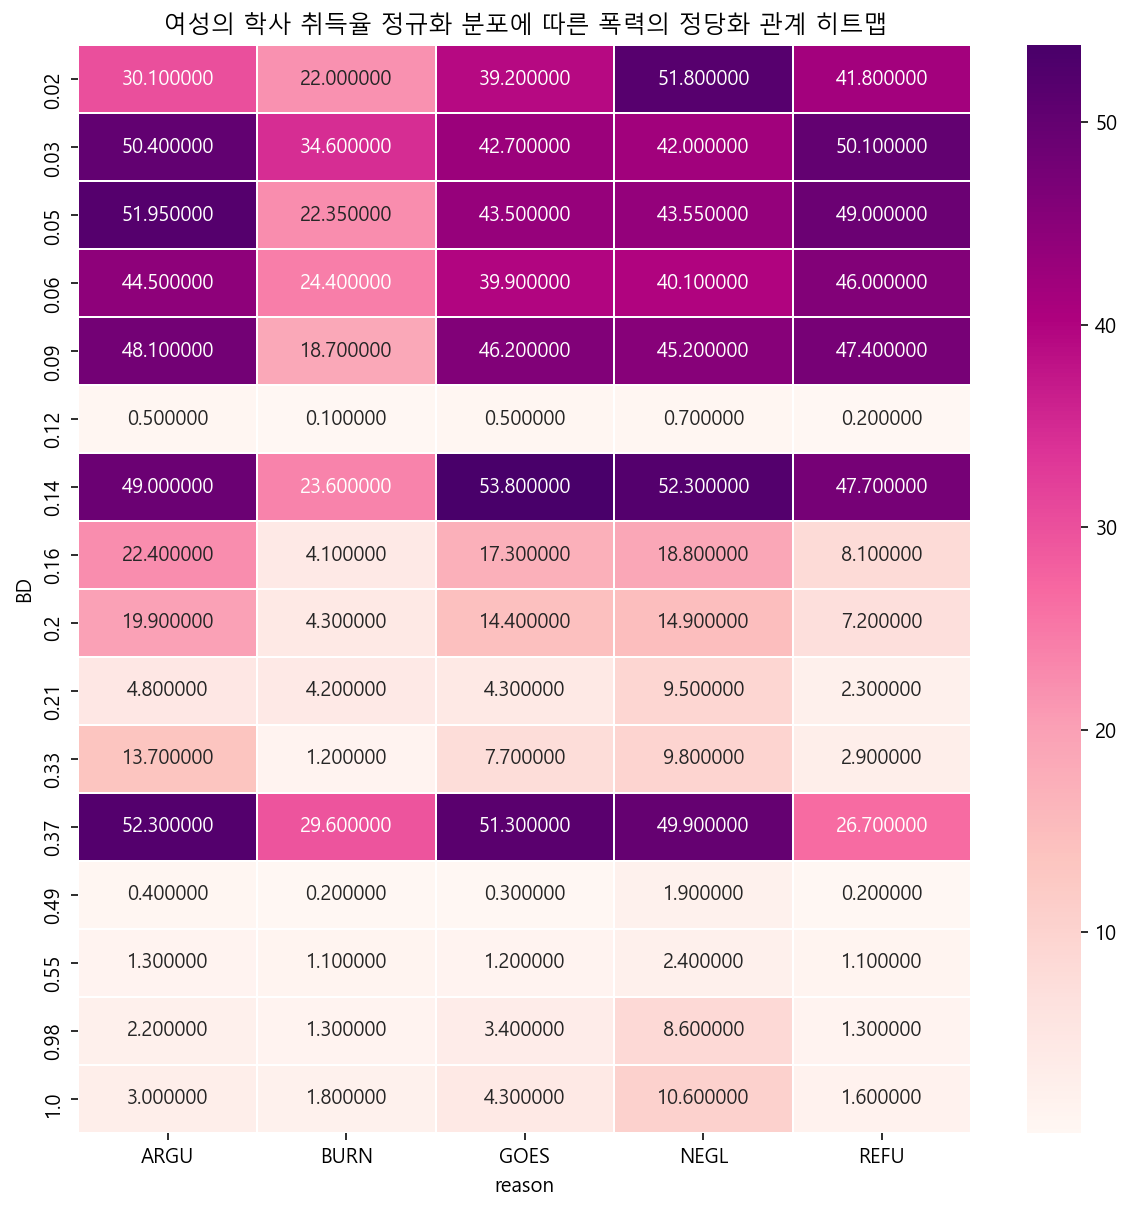

In [97]:
fmDT = pd.pivot_table(vrjDT.loc[:,['ARGU', 'BURN', 'GOES', 'NEGL', 'REFU', 'F']], index= ['F'], aggfunc=np.mean)

plt.figure(figsize=(10,10))
sns.heatmap(fmDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('여성의 학사 취득율 정규화 분포에 따른 폭력의 정당화 관계 히트맵')
plt.xlabel('reason')
plt.ylabel('BD')
plt.show()

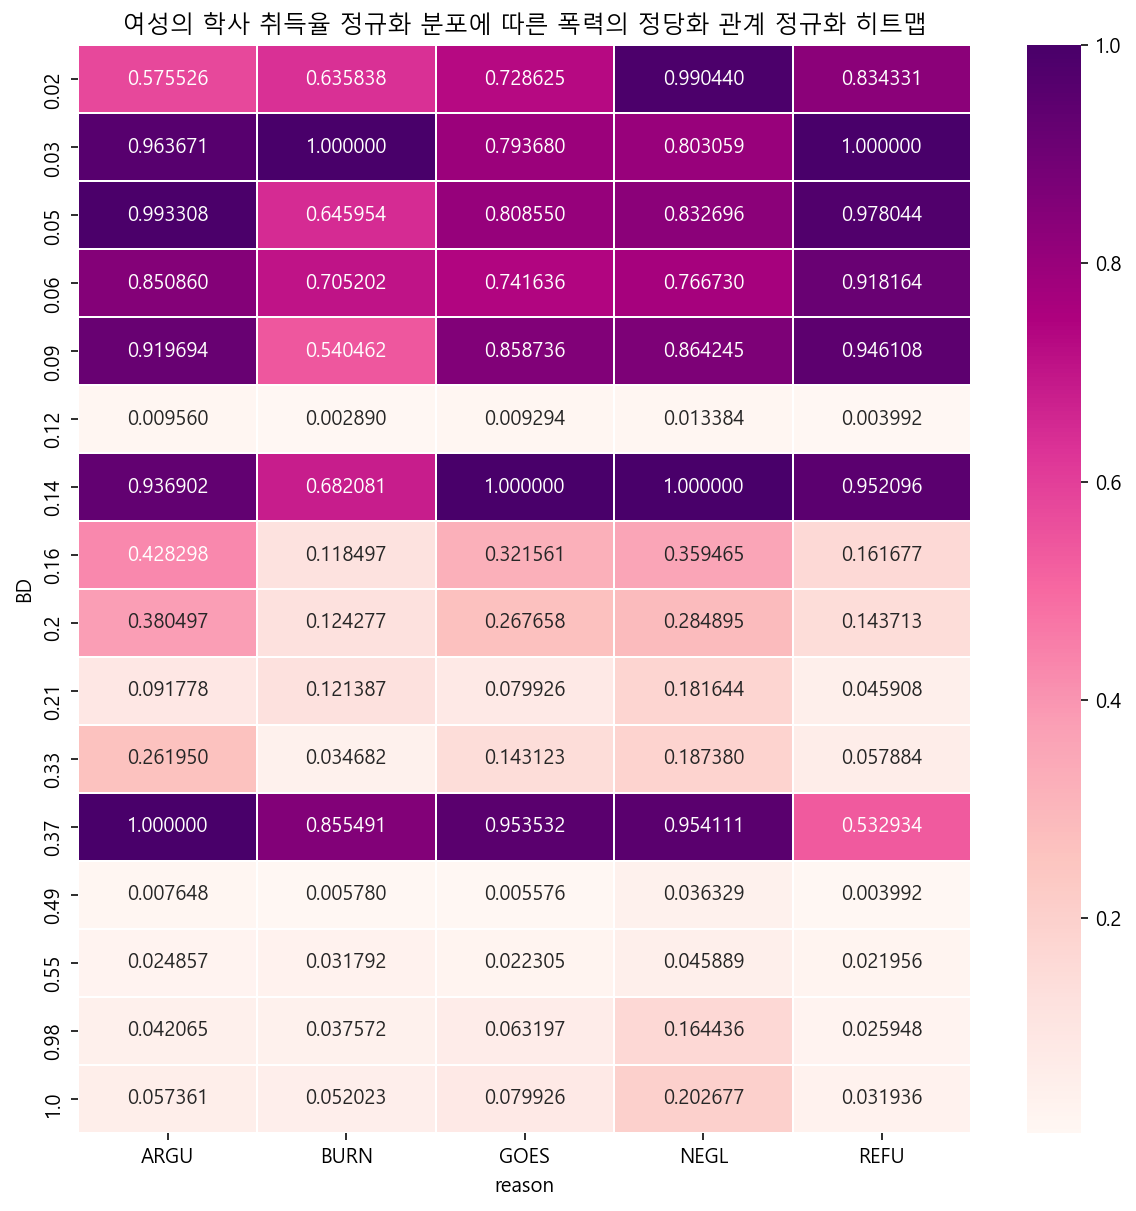

In [98]:
fmrDT = vrjDT.copy()
fmRDT = pd.pivot_table(fmrDT.loc[:,['ARGU', 'BURN', 'GOES', 'NEGL', 'REFU', 'F']], index= ['F'], aggfunc=np.mean)
fmRDT = fmRDT / fmRDT.max()

plt.figure(figsize=(10,10))
sns.heatmap(fmRDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('여성의 학사 취득율 정규화 분포에 따른 폭력의 정당화 관계 정규화 히트맵')
plt.xlabel('reason')
plt.ylabel('BD')
plt.show()
### 데이터가 적어서 엄청난 관련성이라고 보기는 어렵지만,
### 확실히 학사 취득율이 높을 때 정당화 하지 않을 확률이 높다고 볼 수도 있을 것 같음.

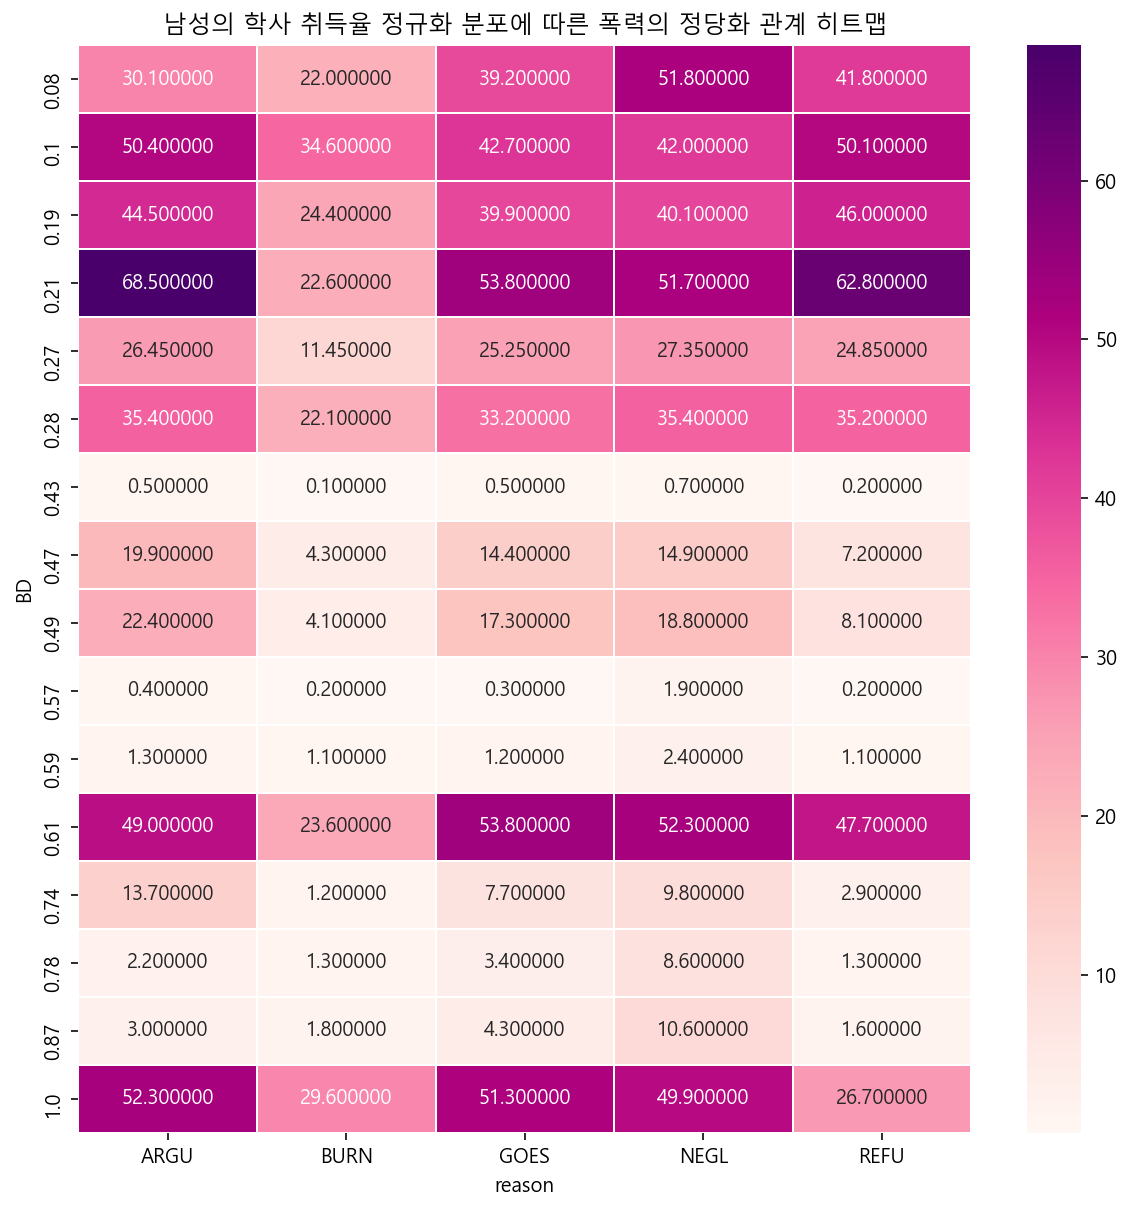

In [99]:
fmDT = pd.pivot_table(vrjDT.loc[:,['ARGU', 'BURN', 'GOES', 'NEGL', 'REFU', 'M']], index= ['M'], aggfunc=np.mean)

plt.figure(figsize=(10,10))
sns.heatmap(fmDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')
plt.title('남성의 학사 취득율 정규화 분포에 따른 폭력의 정당화 관계 히트맵')
plt.xlabel('reason')
plt.ylabel('BD')
plt.show()

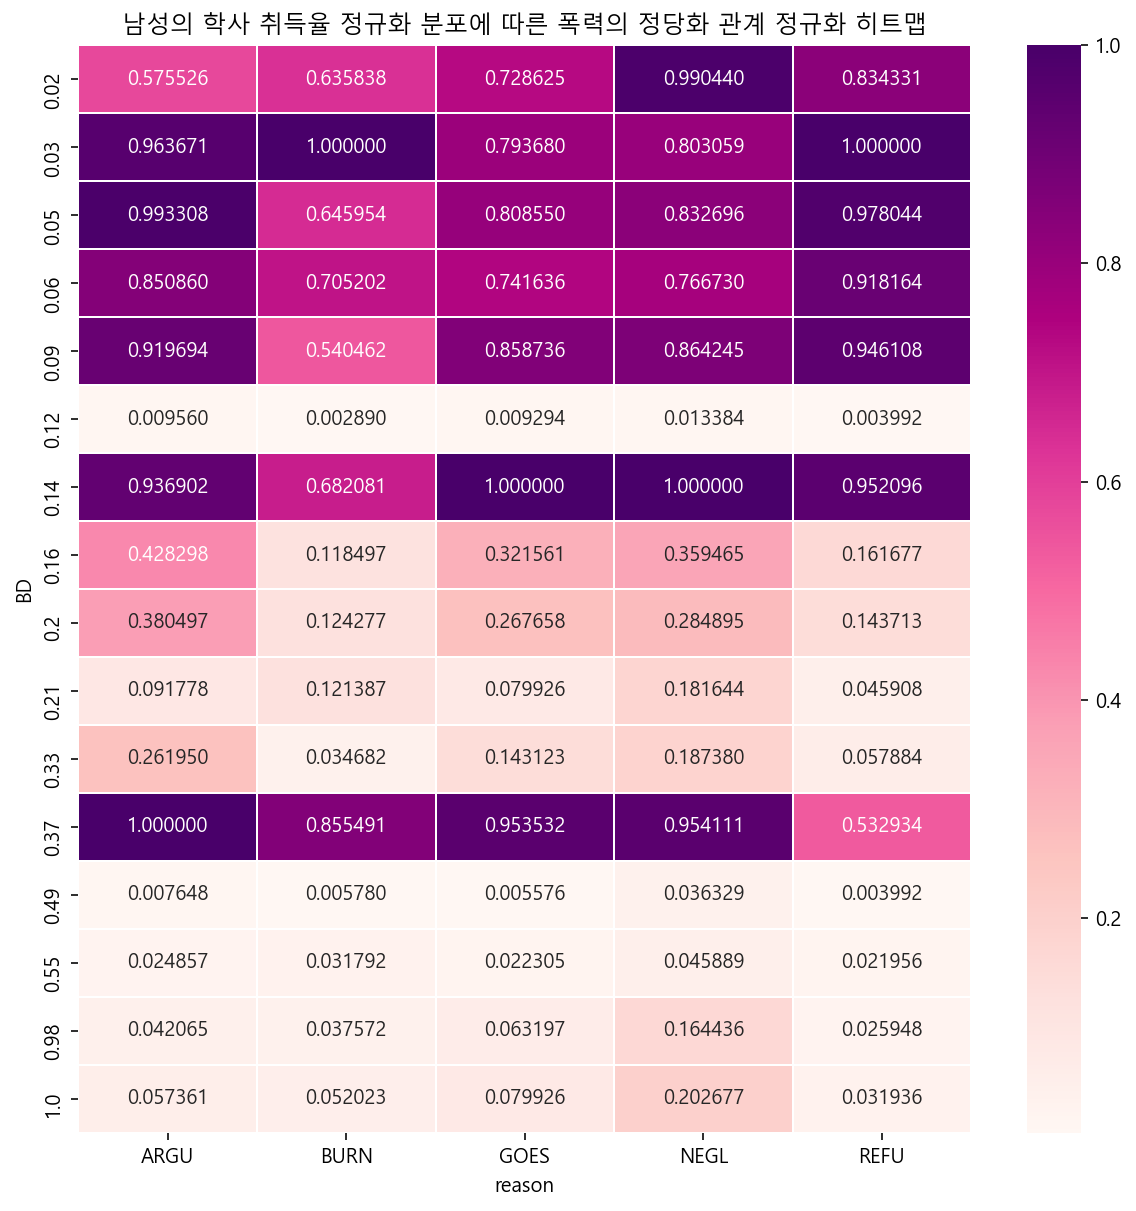

In [100]:
plt.figure(figsize=(10,10))

fmrDT = vrjDT.copy()
fmRDT = pd.pivot_table(fmrDT.loc[:,['ARGU', 'BURN', 'GOES', 'NEGL', 'REFU', 'F']], index= ['F'], aggfunc=np.mean)
fmRDT = fmRDT / fmRDT.max()
sns.heatmap(fmRDT, annot=True, fmt='f', linewidth='.5', cmap='RdPu')

plt.title('남성의 학사 취득율 정규화 분포에 따른 폭력의 정당화 관계 정규화 히트맵')
plt.xlabel('reason')
plt.ylabel('BD')
plt.show()
### 남성에서도 비슷한 양상